<a href="https://colab.research.google.com/github/Shoaib26-1994/Global_Terrorism_EDA/blob/main/Global_Terrorism_Final_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import figure
import matplotlib_inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Global Terrorism Data.csv",encoding = 'ISO-8859-1')

<ipython-input-2-c4b286a39980>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Global Terrorism Data.csv",encoding = 'ISO-8859-1')


In [ ]:
df.shape

(181691, 135)

In [ ]:
pd.set_option('display.max_columns',135)

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
for col in df.columns:
  print(col, end ="  ")

eventid  iyear  imonth  iday  approxdate  extended  resolution  country  country_txt  region  region_txt  provstate  city  latitude  longitude  specificity  vicinity  location  summary  crit1  crit2  crit3  doubtterr  alternative  alternative_txt  multiple  success  suicide  attacktype1  attacktype1_txt  attacktype2  attacktype2_txt  attacktype3  attacktype3_txt  targtype1  targtype1_txt  targsubtype1  targsubtype1_txt  corp1  target1  natlty1  natlty1_txt  targtype2  targtype2_txt  targsubtype2  targsubtype2_txt  corp2  target2  natlty2  natlty2_txt  targtype3  targtype3_txt  targsubtype3  targsubtype3_txt  corp3  target3  natlty3  natlty3_txt  gname  gsubname  gname2  gsubname2  gname3  gsubname3  motive  guncertain1  guncertain2  guncertain3  individual  nperps  nperpcap  claimed  claimmode  claimmode_txt  claim2  claimmode2  claimmode2_txt  claim3  claimmode3  claimmode3_txt  compclaim  weaptype1  weaptype1_txt  weapsubtype1  weapsubtype1_txt  weaptype2  weaptype2_txt  weapsubtype2

In [ ]:
df = df[['iyear','imonth','iday','country_txt','region_txt','city','latitude','longitude','success','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt','gname','motive','weaptype1_txt','nkill','nwound','ishostkid']]

In [ ]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,ishostkid
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Named Civilian,MANO-D,NaN,Unknown,1.0,0.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,NaN,Unknown,0.0,0.0,1.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,NaN,Unknown,1.0,0.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,NaN,Explosives,NaN,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,NaN,Incendiary,NaN,NaN,0.0


In [ ]:
df.shape

(181691, 19)

In [ ]:
df.sample(5)

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,ishostkid
136876,2014,8,23,Pakistan,South Asia,Quetta,30.200819,66.994354,0,0,Bombing/Explosion,Unknown,NaN,Unknown,NaN,Explosives,0.0,0.0,0.0
7956,1979,3,25,Spain,Western Europe,Las Arenas,43.325239,-3.011475,0,0,Assassination,Government (General),Politician or Political Party Movement/Meeting...,Basque Fatherland and Freedom (ETA),NaN,Firearms,0.0,0.0,0.0
171976,2017,2,11,Afghanistan,South Asia,Kabul,34.516895,69.147011,1,0,Bombing/Explosion,Government (General),Government Building/Facility/Office,Taliban,NaN,Explosives,0.0,0.0,0.0
83560,2007,6,13,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,1,0,Bombing/Explosion,Private Citizens & Property,Race/Ethnicity Identified,Unknown,Unknown,Explosives,2.0,6.0,0.0
116208,2013,4,19,Afghanistan,South Asia,Warduj district,36.997069,70.865722,1,0,Armed Assault,Police,Police Checkpoint,Taliban,NaN,Firearms,3.0,NaN,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   country_txt       181691 non-null  object 
 4   region_txt        181691 non-null  object 
 5   city              181257 non-null  object 
 6   latitude          177135 non-null  float64
 7   longitude         177134 non-null  float64
 8   success           181691 non-null  int64  
 9   suicide           181691 non-null  int64  
 10  attacktype1_txt   181691 non-null  object 
 11  targtype1_txt     181691 non-null  object 
 12  targsubtype1_txt  171318 non-null  object 
 13  gname             181691 non-null  object 
 14  motive            50561 non-null   object 
 15  weaptype1_txt     181691 non-null  object 
 16  nkill             17

In [ ]:
df.describe(include = object)

,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,motive,weaptype1_txt
count,181691,181691,181257,181691,181691,171318,181691,50561,181691
unique,205,12,36674,9,22,112,3537,14490,12
top,Iraq,Middle East & North Africa,Unknown,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Unknown,Unknown,Explosives
freq,24636,50474,9775,88255,43511,11596,82782,14889,92426


In [ ]:
df.describe(include = 'all')

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,ishostkid
count,181691.000000,181691.000000,181691.000000,181691,181691,181257,177135.000000,1.771340e+05,181691.000000,181691.000000,181691,181691,171318,181691,50561,181691,171378.000000,165380.000000,181513.000000
unique,NaN,NaN,NaN,205,12,36674,NaN,NaN,NaN,NaN,9,22,112,3537,14490,12,NaN,NaN,NaN
top,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,NaN,NaN,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Unknown,Unknown,Explosives,NaN,NaN,NaN
freq,NaN,NaN,NaN,24636,50474,9775,NaN,NaN,NaN,NaN,88255,43511,11596,82782,14889,92426,NaN,NaN,NaN
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,23.498343,-4.586957e+02,0.889598,0.036507,NaN,NaN,NaN,NaN,NaN,NaN,2.403272,3.167668,0.059054
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,18.569242,2.047790e+05,0.313391,0.187549,NaN,NaN,NaN,NaN,NaN,NaN,11.545741,35.949392,0.461244
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,-53.154613,-8.618590e+07,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-9.000000
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,11.510046,4.545640e+00,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,31.467463,4.324651e+01,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,34.685087,6.871033e+01,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000


In [ ]:
df.nunique()

iyear                  47
imonth                 13
iday                   32
country_txt           205
region_txt             12
city                36674
latitude            48322
longitude           48039
success                 2
suicide                 2
attacktype1_txt         9
targtype1_txt          22
targsubtype1_txt      112
gname                3537
motive              14490
weaptype1_txt          12
nkill                 205
nwound                238
ishostkid               3
dtype: int64

In [ ]:
df.drop(['motive'],axis = 1 , inplace= True)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(169116, 18)

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.shape

(141247, 18)

In [ ]:
df.isnull().sum()

iyear               0
imonth              0
iday                0
country_txt         0
region_txt          0
city                0
latitude            0
longitude           0
success             0
suicide             0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
gname               0
weaptype1_txt       0
nkill               0
nwound              0
ishostkid           0
dtype: int64

#Q1=Which Year has the most attack

In [ ]:
df['iyear'].value_counts()

2014    13317
2015    11828
2013    10509
2016    10508
2017     8599
2012     7488
2011     4578
2010     4445
2009     4210
2008     4202
1992     4174
1989     3558
1991     3532
1988     3009
1990     2999
1994     2700
2007     2681
1987     2221
1997     2221
1995     2196
2006     2151
1996     2149
1984     2114
1986     1830
1985     1787
1980     1785
2005     1724
1979     1711
2001     1682
1981     1628
1983     1548
2000     1486
1982     1367
1999     1164
2002     1153
2003     1070
1978     1052
2004      972
1977      884
1998      704
1970      545
1976      491
1975      327
1971      288
1974      280
1973      209
1972      171
Name: iyear, dtype: int64

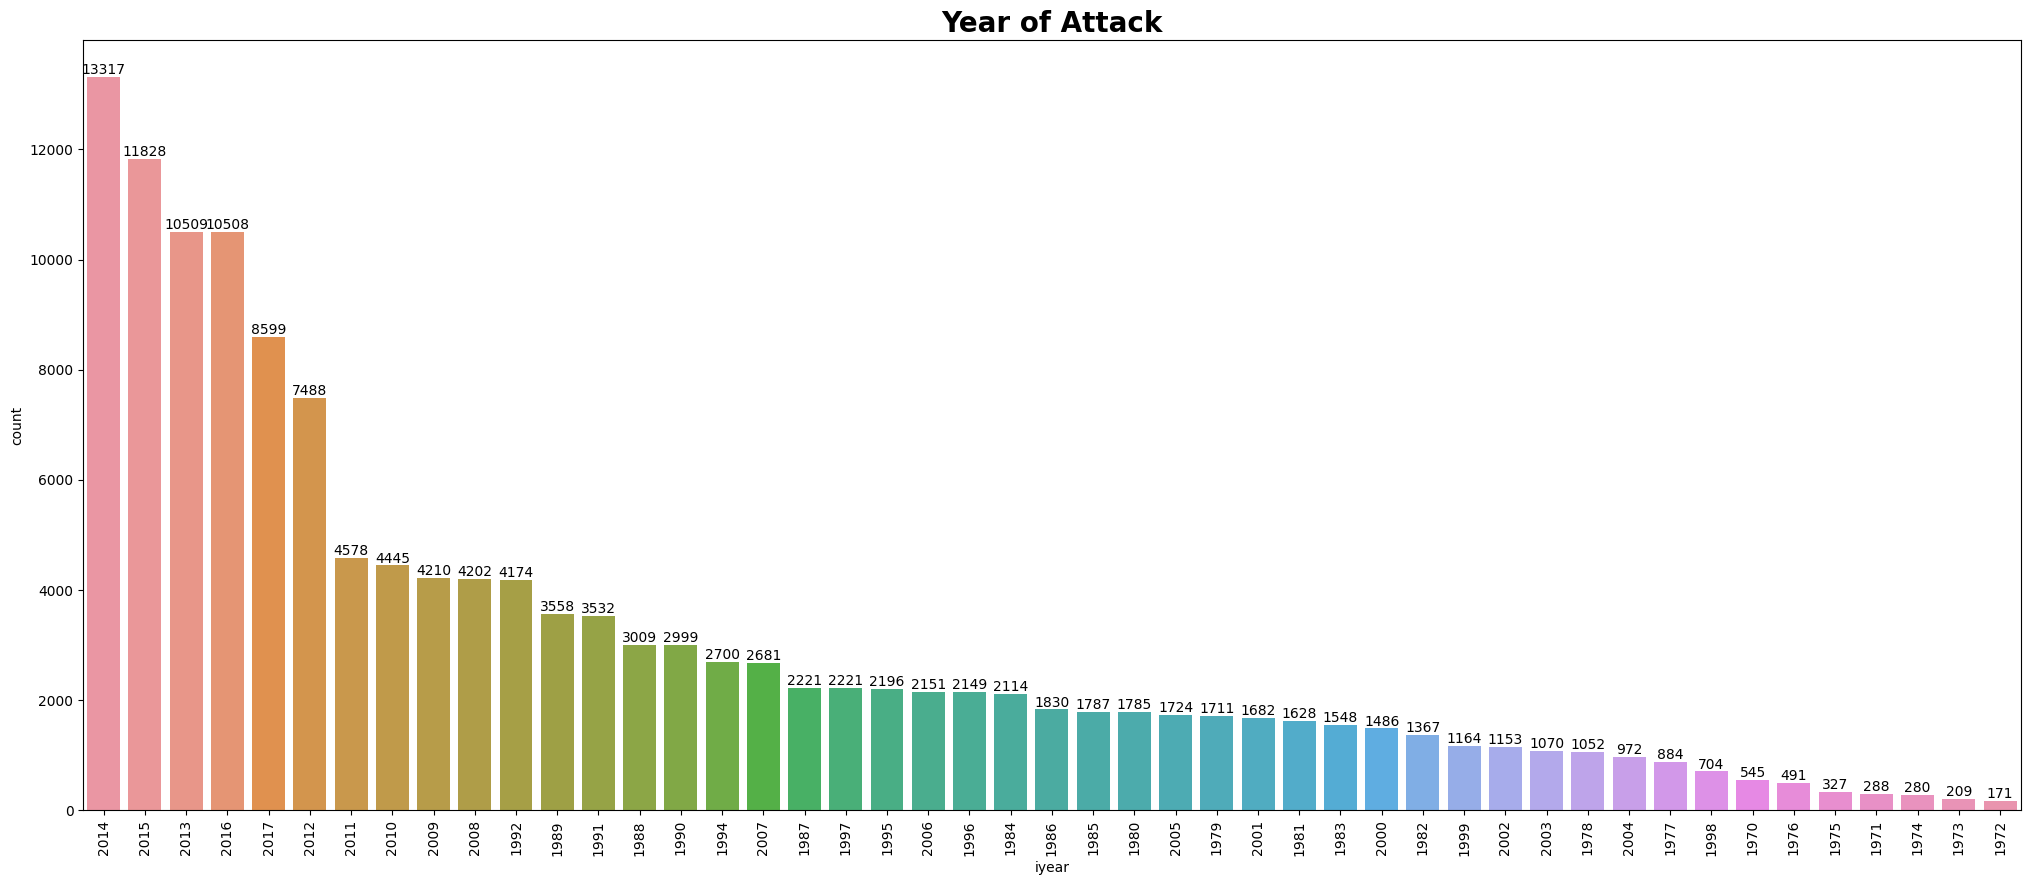

In [ ]:
plt.figure(figsize =(25,10))
ax = sns.countplot(x = df.iyear,order = df['iyear'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Year of Attack", size = 20, fontweight = 'bold')
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

From Above we absorbed that 

since 1972 the Terrorism  is growing in wold 

From 2012 the Terrorism is higlye exploding world

IN recent year 2013,2014,2015,2016,2017 the terrorism is on the top 

The growth rate of Terrorism is approximate 98 % from 1972

# Top 10 years

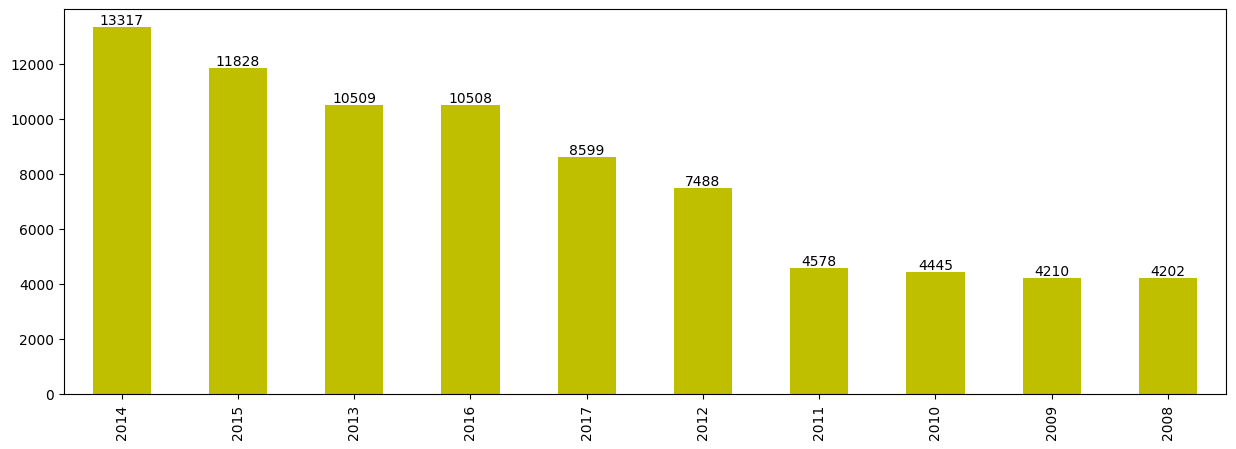

In [ ]:
plt.figure(figsize = (15,5))
ax = df['iyear'].value_counts()[:10].plot(kind  = 'bar', color = 'y')
for i in ax.containers:
  ax.bar_label(i,)


From Above we absorved that the top 10 years which faces the most attacke from terrorism 

#Q2= Which Mosnts has the most attack

In [ ]:
df['imonth'].value_counts()

5     12768
7     12724
8     12371
10    12146
4     11950
6     11949
3     11787
11    11774
1     11577
9     10986
2     10721
12    10487
0         7
Name: imonth, dtype: int64

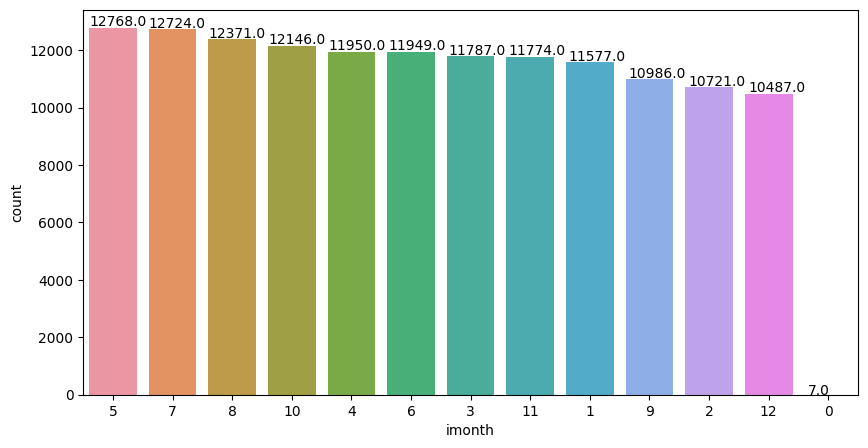

In [ ]:
plt.figure(figsize =( 10,5))
ax =sns.countplot(data = df , x= 'imonth',order=df['imonth'].value_counts().index)
for i in ax.patches:
  ax.annotate(str(i.get_height()),(i.get_x()*1.005,i.get_height()*1.005))

From Above we observed that 

There is not as fixed month of attack as is almost same in all months

But in the months of May , July and August having most number of attack 

#Q =3 Which Day has the most attacked?

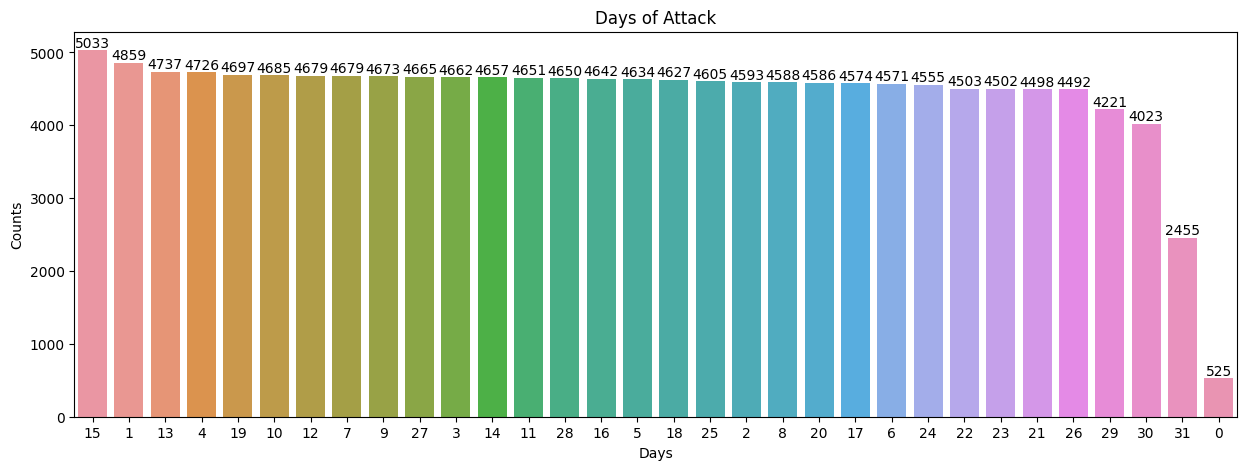

In [ ]:
plt.figure(figsize= (15,5))
ax = sns.countplot(data = df, x= 'iday', order= df['iday'].value_counts().index)
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Days of Attack')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

From above we absorved that

On 15 and 1 of the month there is high terrorsim atttack

On the last days of the month like 28 to 31 there is less attack happen

# Q 4 = Which country has  most Attacked 

In [ ]:
len(df['country_txt'].value_counts())

202

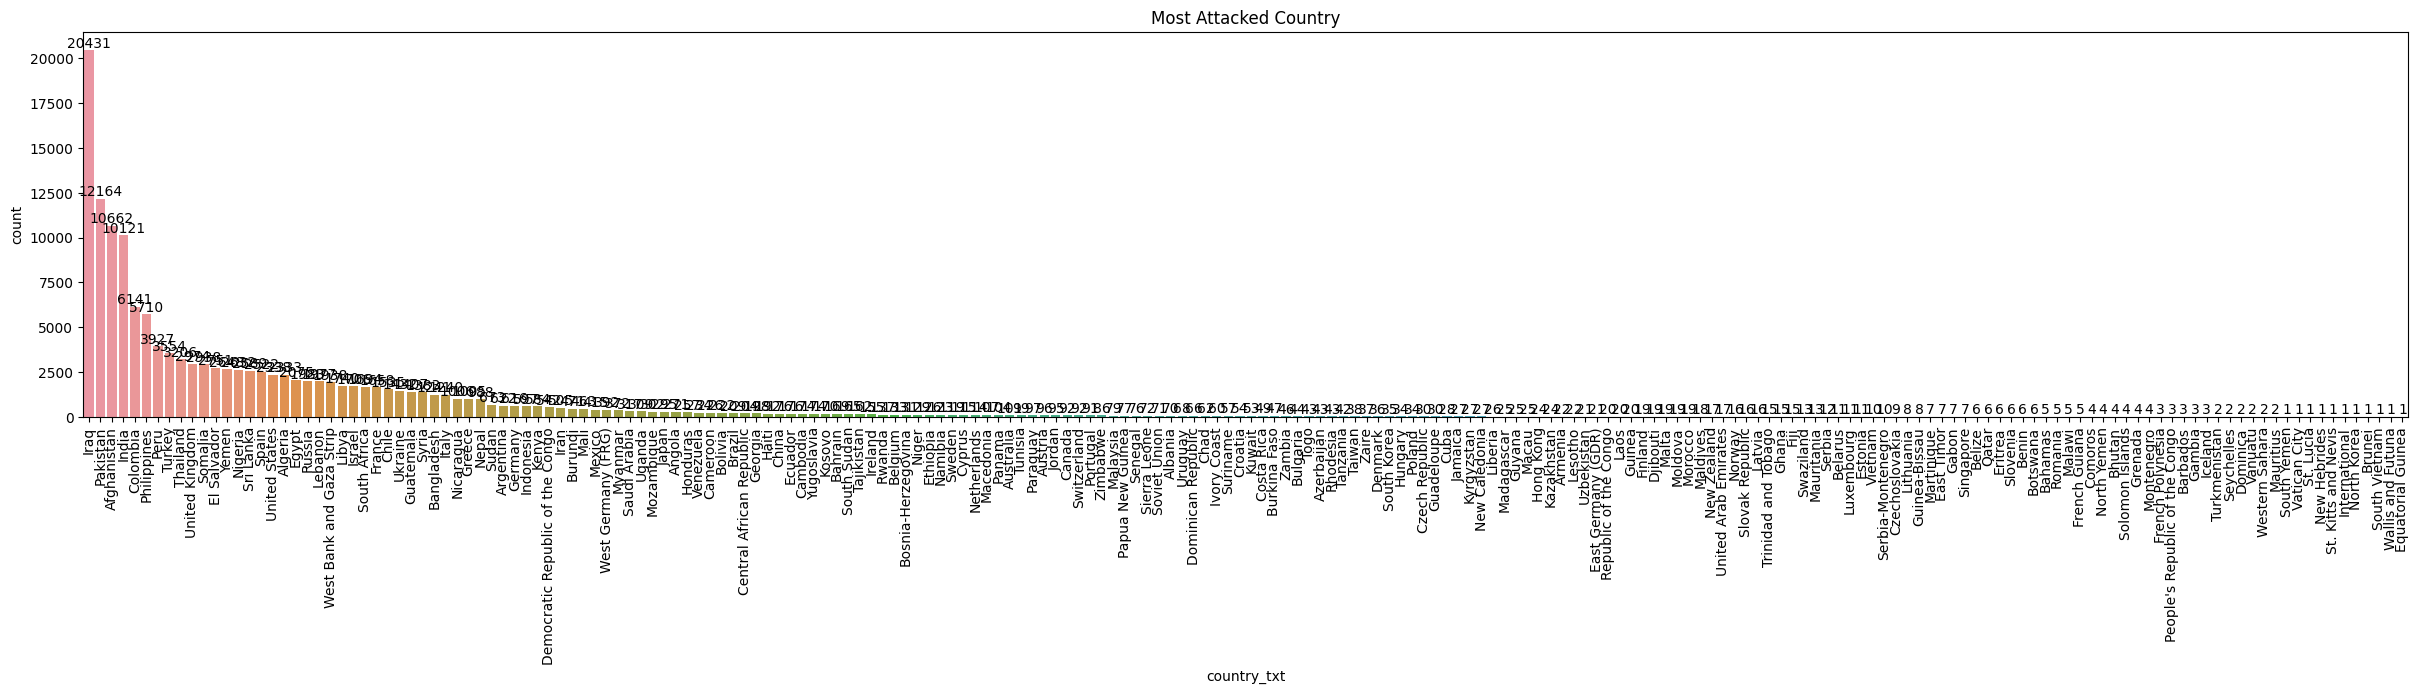

In [ ]:
plt.figure(figsize =(30,5))
plt.xlabel('Top 20 Country')
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.title('Most Attacked Country')
ax = sns.countplot(x=df.country_txt, order = df['country_txt'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

From above we observed that  almost every country is having Terrorism Attack 

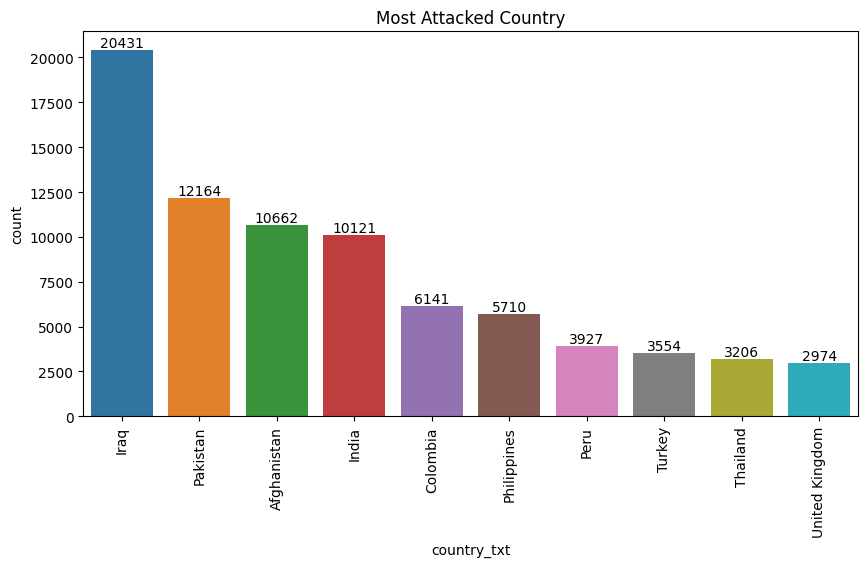

In [ ]:
plt.figure(figsize =(10,5))
plt.xlabel('Top 20 Country')
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.title('Most Attacked Country')
ax = sns.countplot(x=df.country_txt, order = df['country_txt'].value_counts()[:10].index)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

From above we observed that in over all world 

Iraq has the most Terrorism attack 

Pakistan has the second most Terrorism attack 

Afghanistan and India are the thired most Terrorism attack country



#Q 5= Which Region has the most Attack?

In [ ]:
df['region_txt'].value_counts()

Middle East & North Africa     41073
South Asia                     37789
South America                  13318
Sub-Saharan Africa             12827
Western Europe                 11427
Southeast Asia                 10184
Central America & Caribbean     5961
Eastern Europe                  4482
North America                   2845
East Asia                        594
Central Asia                     499
Australasia & Oceania            248
Name: region_txt, dtype: int64

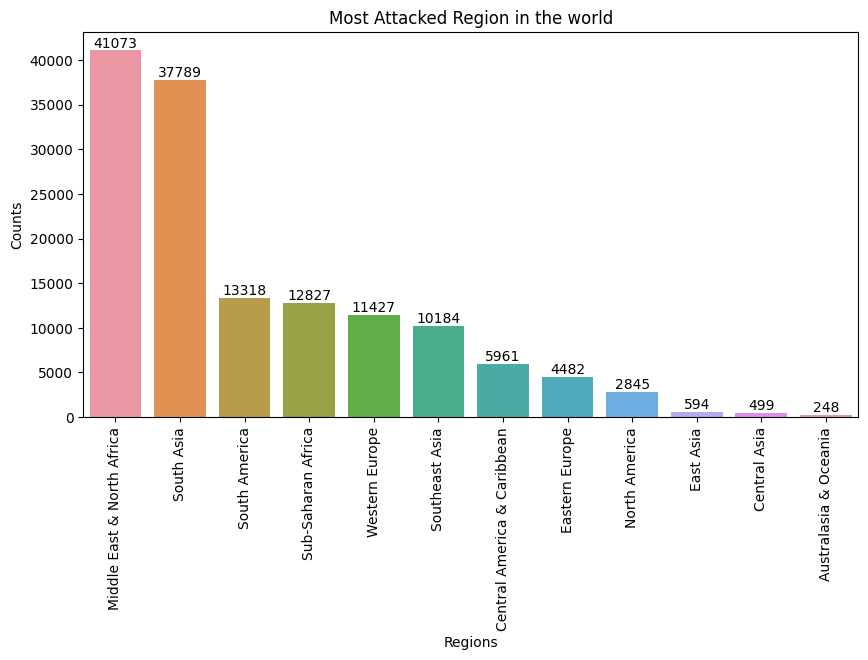

In [ ]:
plt.figure(figsize = (10,5))
ax =sns.countplot(data = df,  x = 'region_txt',order = df['region_txt'].value_counts().index)
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Most Attacked Region in the world')
plt.xlabel("Regions")
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.show()

From above we observed that 

Middle East & North Africa region has the most attack in over all region 

second most Attack region is Sout Asia 

#Q 6 = Which City is most targeted by the Attack? 

In [ ]:
df['city'].value_counts()

Baghdad             6867
Unknown             5090
Karachi             1986
Mosul               1810
Lima                1393
                    ... 
Sadado                 1
Na Mom                 1
Chamtal district       1
Torit district         1
Kubentog               1
Name: city, Length: 31270, dtype: int64

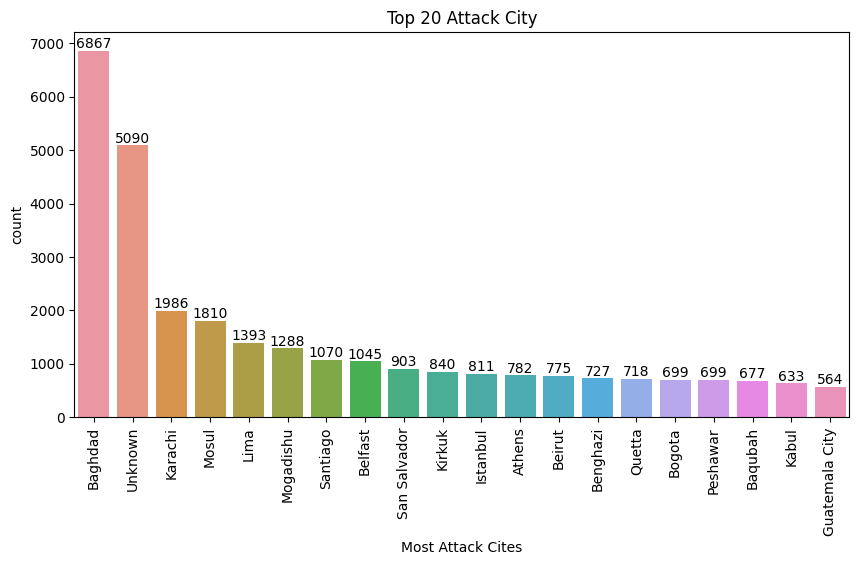

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=df.city, order = df['city'].value_counts().head(20).index)
plt.xticks(rotation = 90)
plt.xlabel('Most Attack Cites')
plt.title('Top 20 Attack City')
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

<Axes: >

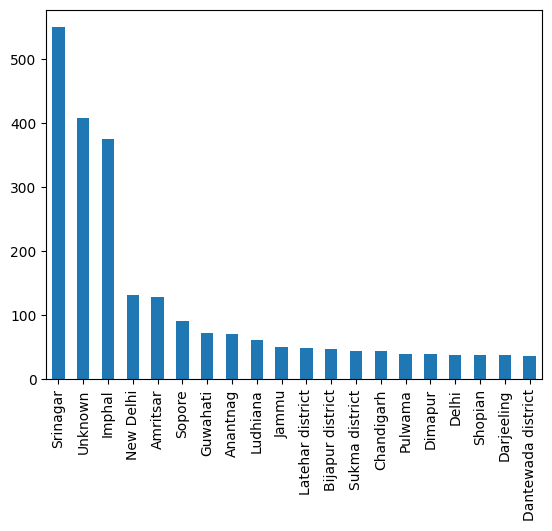

In [ ]:
df[df['country_txt']=='India']['city'].value_counts().head(20).plot(kind = 'bar')

In [ ]:
df['country_txt'].value_counts().head(8)


Iraq           20431
Pakistan       12164
Afghanistan    10662
India          10121
Colombia        6141
Philippines     5710
Peru            3927
Turkey          3554
Name: country_txt, dtype: int64

# Top Countries Attack with there  top City 

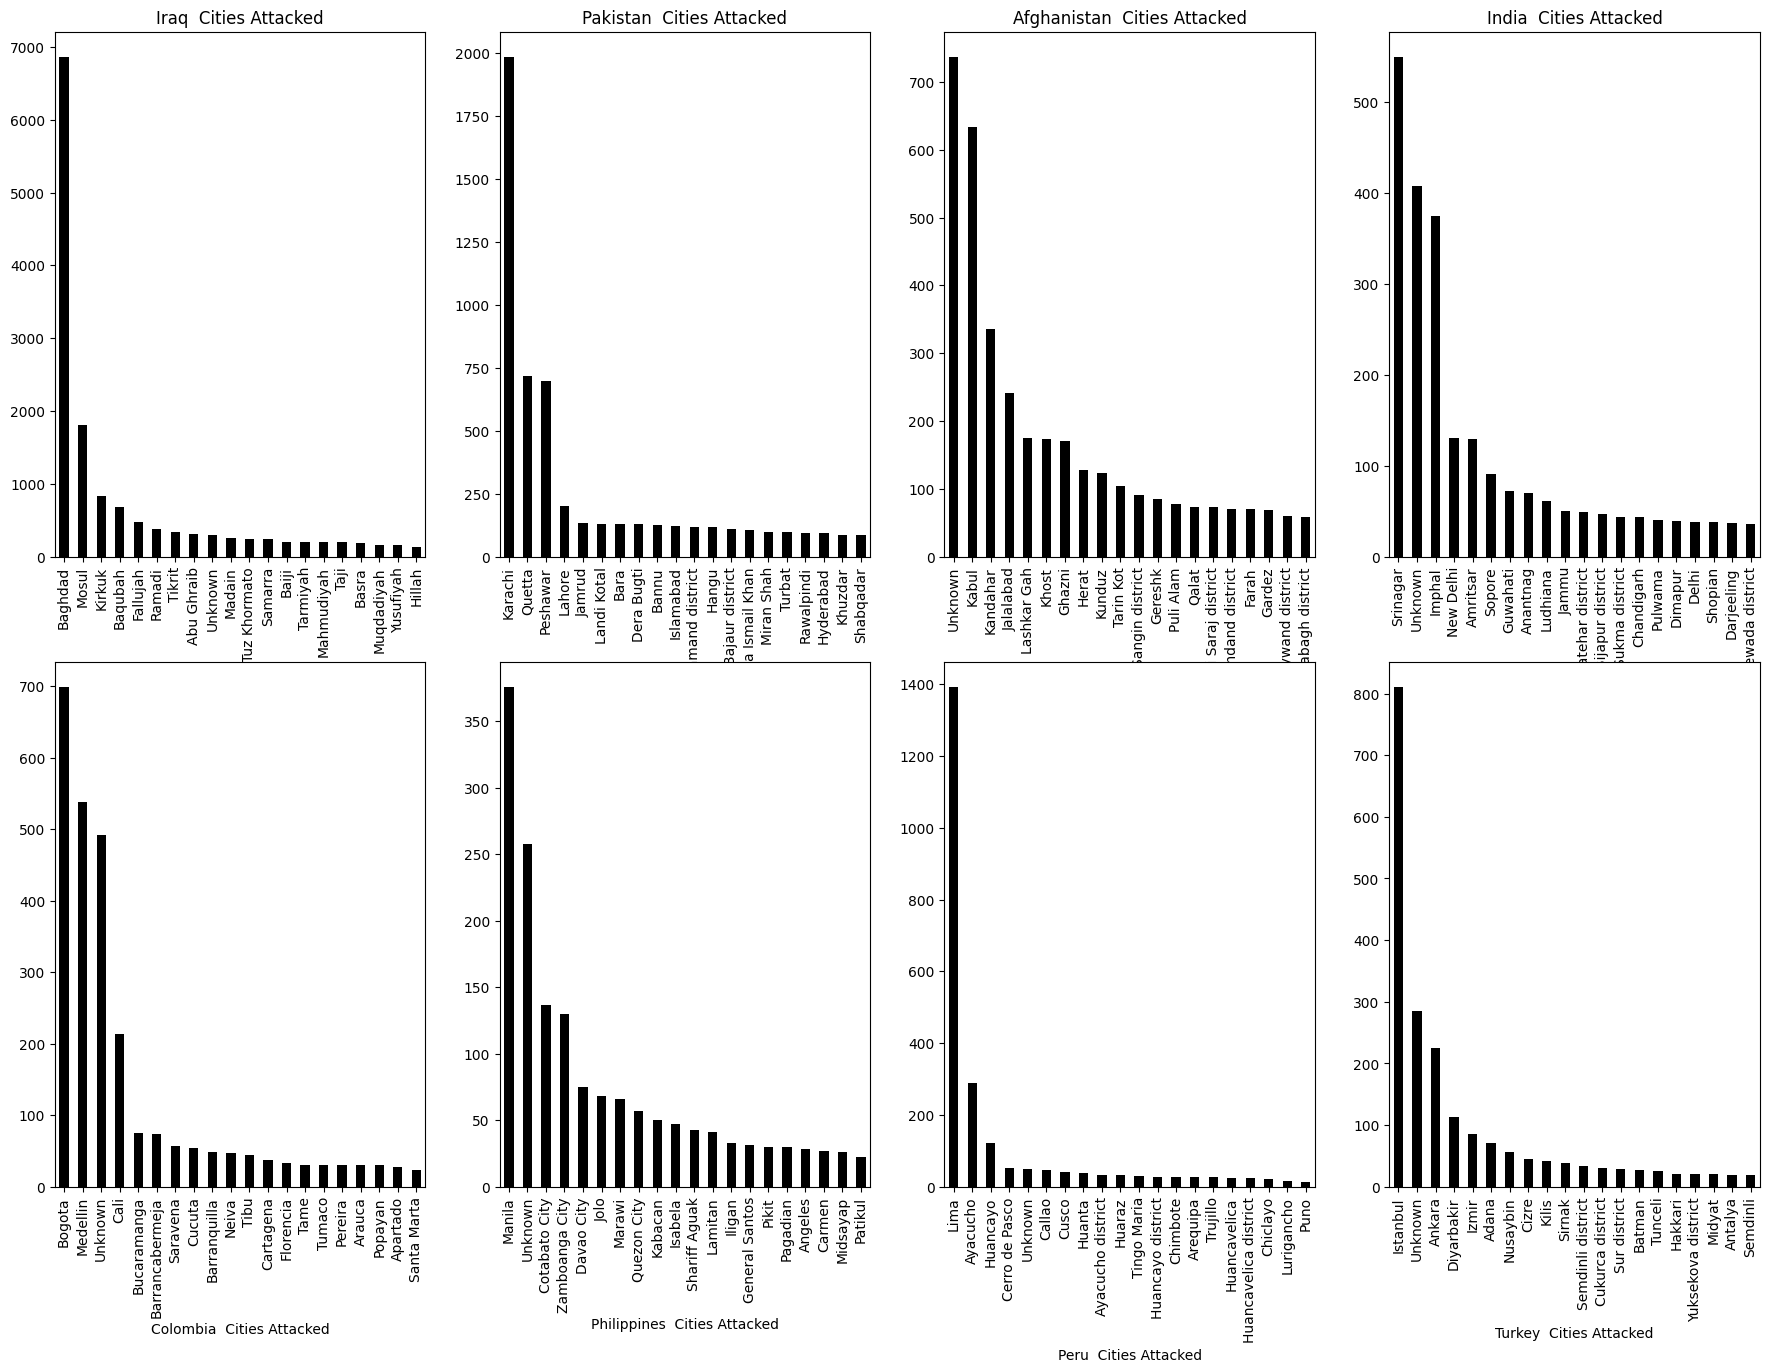

In [ ]:
plt.figure(figsize =(22,15))
plt.subplot(2,4,1)
df[df['country_txt'] == 'Iraq']['city'].value_counts().head(20).plot(kind = 'bar', color = 'k')
plt.title('Iraq  Cities Attacked')
plt.subplot(2,4,2)
df[df['country_txt'] == 'Pakistan']['city'].value_counts().head(20).plot(kind = 'bar', color = 'k')
plt.title('Pakistan  Cities Attacked')
plt.subplot(2,4,3)
df[df['country_txt'] == 'Afghanistan']['city'].value_counts().head(20).plot(kind = 'bar', color = 'k')
plt.title('Afghanistan  Cities Attacked')
plt.subplot(2,4,4)
df[df['country_txt'] == 'India']['city'].value_counts().head(20).plot(kind = 'bar', color = 'k')
plt.title('India  Cities Attacked')
plt.subplot(2,4,5)
df[df['country_txt'] == 'Colombia']['city'].value_counts().head(20).plot(kind = 'bar', color = 'k')
plt.xlabel('Colombia  Cities Attacked')
plt.subplot(2,4,6)
df[df['country_txt'] == 'Philippines']['city'].value_counts().head(20).plot(kind = 'bar', color = 'k')
plt.xlabel('Philippines  Cities Attacked')
plt.subplot(2,4,7)
df[df['country_txt'] == 'Peru']['city'].value_counts().head(20).plot(kind = 'bar', color = 'k')
plt.xlabel('Peru  Cities Attacked')
plt.subplot(2,4,8)
df[df['country_txt'] == 'Turkey']['city'].value_counts().head(20).plot(kind = 'bar', color = 'k')
plt.xlabel('Turkey  Cities Attacked')
plt.show()

From above we observed that the top most attack country with there  highest 
 attack cites

 Baghdad is the world most attack city in the wolrd


# Year vs Success in Attack

<Axes: xlabel='iyear', ylabel='Count'>

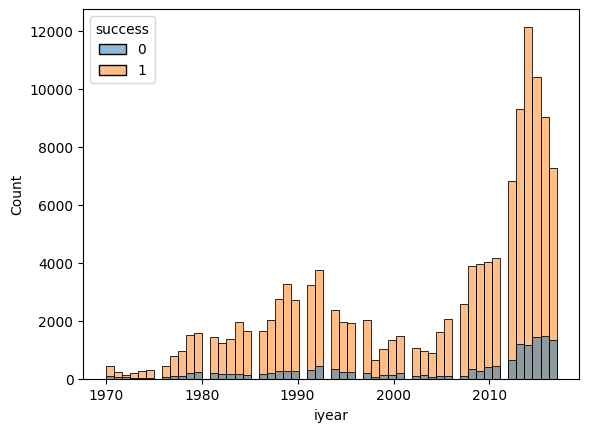

In [ ]:
sns.histplot(data = df , x ='iyear' , hue = 'success' )

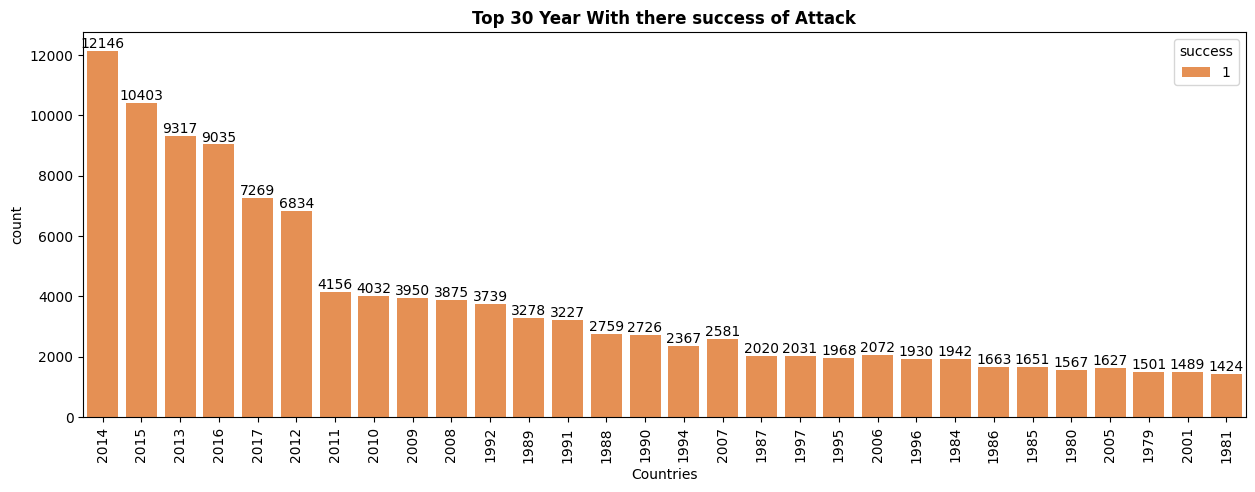

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x= 'iyear', hue = 'success', order= df['iyear'].value_counts().head(30).index, hue_order = df['success'].value_counts()[:1].index, palette='YlOrRd')
plt.xticks(rotation = 90)
plt.xlabel('Countries')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Top 30 Year With there success of Attack', fontweight = 'bold')
plt.show()

From above we observed that

The success of attack in the years 

In 2014 the attack sucess rate is highest


# Year wise Pattern of Attack

In [ ]:
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      67917
Armed Assault                          34752
Assassination                          16289
Facility/Infrastructure Attack          7858
Hostage Taking (Kidnapping)             7066
Unknown                                 5332
Unarmed Assault                          772
Hostage Taking (Barricade Incident)      735
Hijacking                                526
Name: attacktype1_txt, dtype: int64

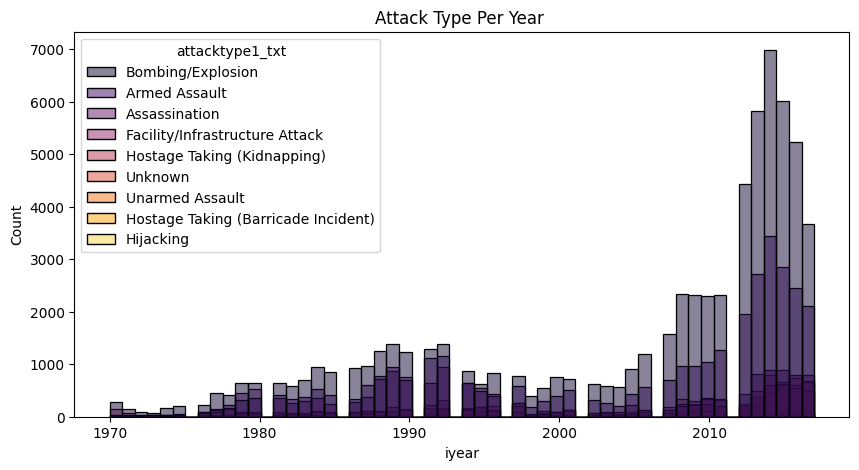

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data = df ,x='iyear', hue = 'attacktype1_txt', hue_order =  df['attacktype1_txt'].value_counts().index, palette='inferno')
plt.title("Attack Type Per Year ")
plt.show()

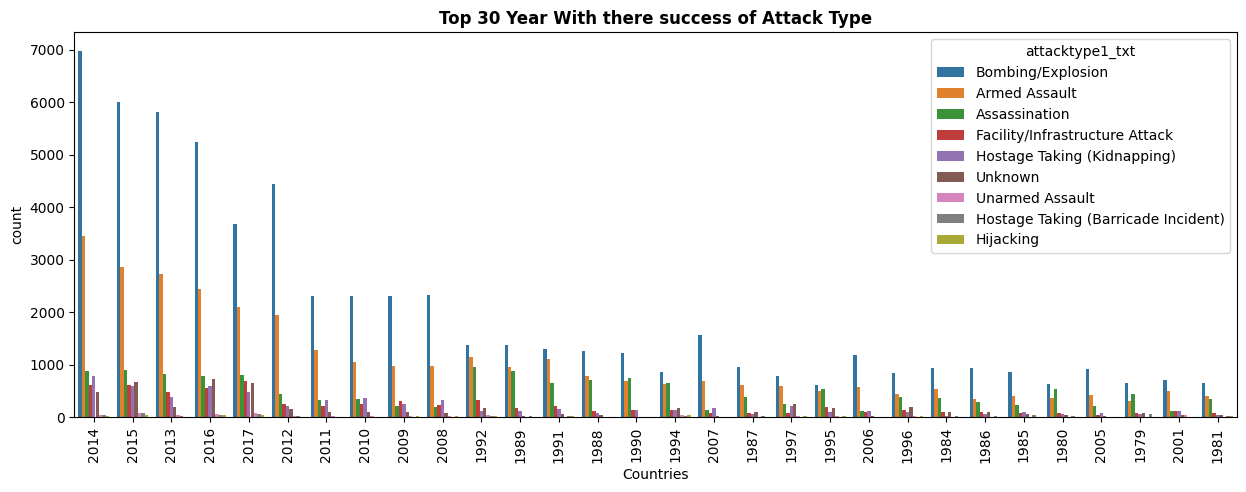

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x= 'iyear', hue = 'attacktype1_txt', order= df['iyear'].value_counts().head(30).index, hue_order = df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.title('Top 30 Year With there success of Attack Type', fontweight = 'bold')
plt.show()

From above we observed that

Bombing/Explosion is most opted by the attacker through the years

Second most opted attack type is Armed assault 

Thired most opted attack type is Assassination

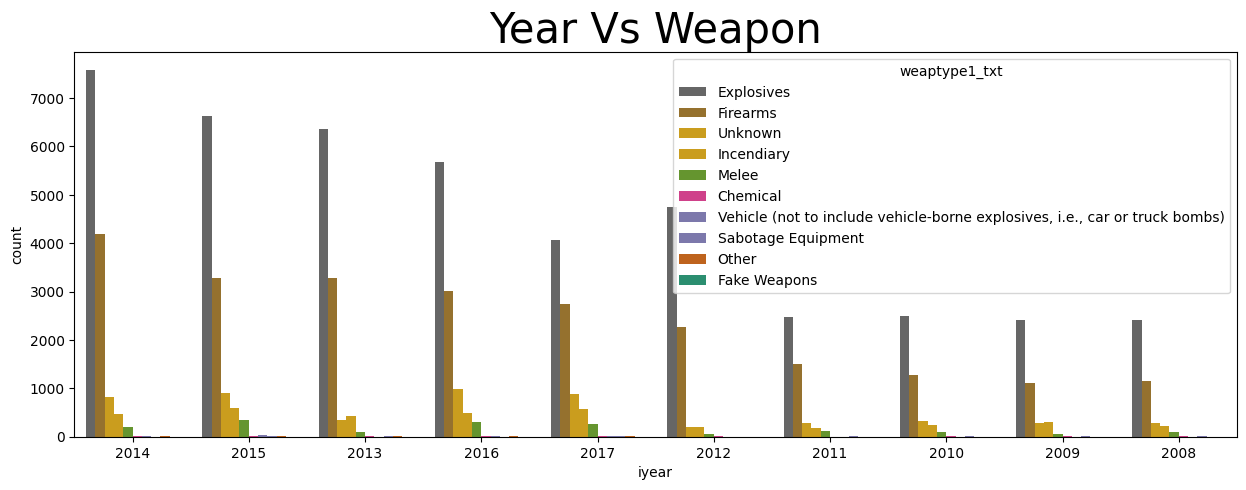

In [ ]:
plt.subplots(figsize = (15,5))
Top_10_Group = df['iyear'].value_counts().index.tolist()[0:10]
snap = df[['iyear','weaptype1_txt']]
country_Weapon = snap[snap['iyear'].isin(Top_10_Group)]
sns.countplot(x='iyear', hue ='weaptype1_txt', data = country_Weapon,order = df['iyear'].value_counts().head(10).index  ,hue_order= df['weaptype1_txt'].value_counts()[:10].index,palette = 'Dark2_r')
plt.title('Year Vs Weapon', fontsize = 30)
plt.show()

From above we observed that 

From 2008  to 2014 mainly 

Explosive , Firearm a, Incendiary, Melee are used as the Weapon for attack

In [ ]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       34758
Military                          22421
Police                            21722
Government (General)              18462
Business                          14280
Transportation                     5403
Religious Figures/Institutions     3768
Educational Institution            3690
Utilities                          3377
Government (Diplomatic)            3094
Terrorists/Non-State Militia       2481
Journalists & Media                2376
Violent Political Party            1655
Airports & Aircraft                1138
NGO                                 747
Telecommunication                   673
Tourists                            381
Food or Water Supply                243
Abortion Related                    241
Maritime                            236
Other                               101
Name: targtype1_txt, dtype: int64

# Q What are the target type of terrosrist ?

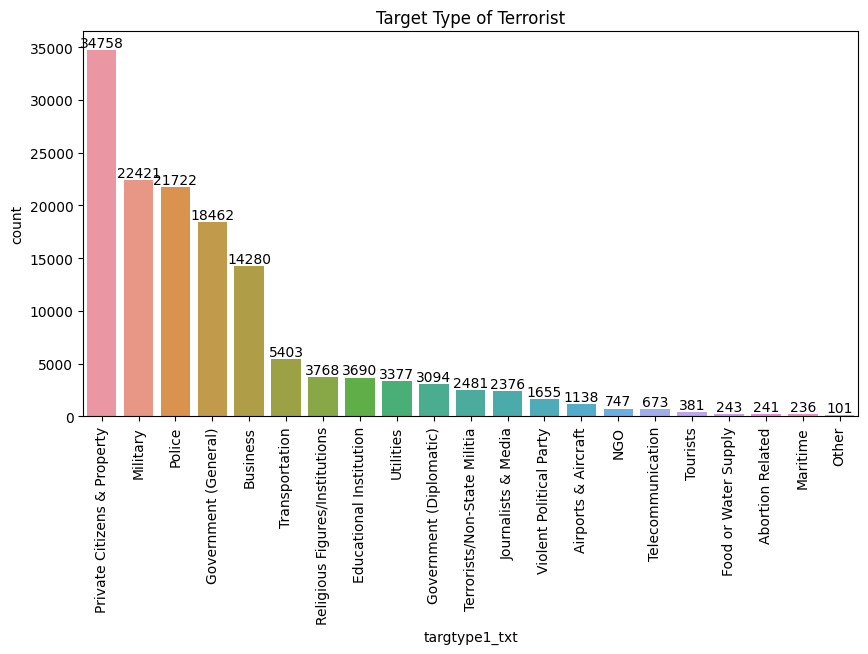

In [ ]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x=df.targtype1_txt, order = df['targtype1_txt'].value_counts().index)
plt.xticks(rotation = 90)
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Target Type of Terrorist')
plt.show()

From Above we observed that 

Private Citizen & propert, Military, Ploice,Goverment(Gernal) and Business are most target type by thr Terrorist 

# Top 10 target Type  Vs success in target types

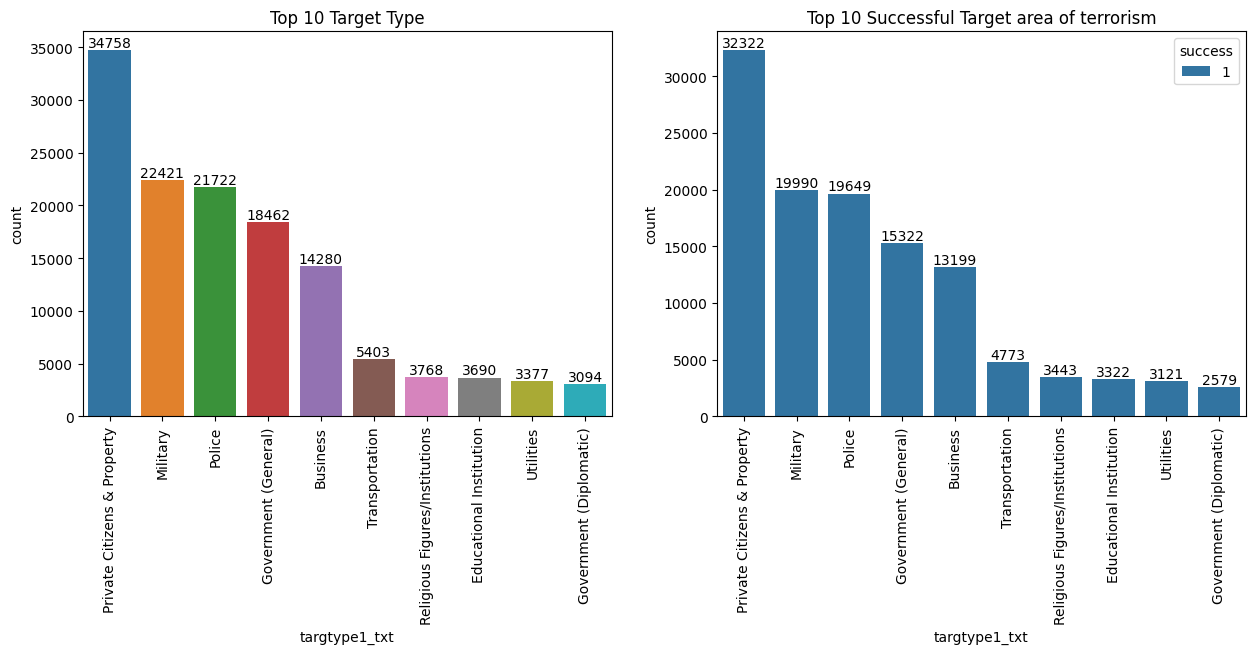

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x= df.targtype1_txt,order = df['targtype1_txt'].value_counts()[:10].index)
plt.xticks(rotation = 90)
plt.title('Top 10 Target Type')
for i in ax.containers:
  ax.bar_label(i,)

plt.subplot(1,2,2)
ax=sns.countplot(data = df, x= "targtype1_txt", hue = "success",order = df['targtype1_txt'].value_counts()[:10].index, hue_order=df['success'].value_counts()[:1].index)
plt.xticks(rotation = 90)
plt.title('Top 10 Successful Target area of terrorism')
for i in ax.containers:
  ax.bar_label(i,)
plt.show()


From above we can say that ,

There is high chance of success in Attack  if the target type is private citizen & property , Militry , police , Goverment (General),Business

# Q Which Attack type used in Target Type?

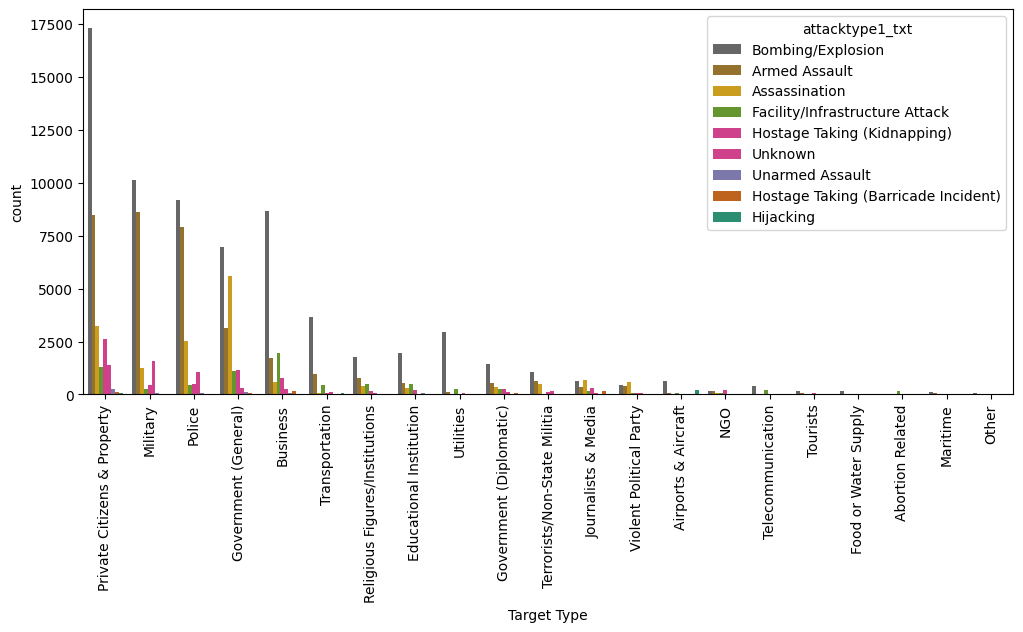

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(data =df , x='targtype1_txt', hue='attacktype1_txt' , order= df['targtype1_txt'].value_counts().index, hue_order= df['attacktype1_txt'].value_counts().index,palette = 'Dark2_r')
plt.xticks(rotation = 90 )
plt.xlabel('Target Type')
plt.show()

From above we observed that

In Private Citizen & propert, Military, Ploice, Goverment(Gernal)  area the majore attack type is Bombing/Explosion ,Armed Assalut,Assassination by the terrorist 

In Business area Bombing/Explosion ,Armed Assalut, Facility/Infrastructure Attack is most opted by the terrorist 

In journalists & Media and Voilent Polotical party area Bombing/Explosion,Assassination Attack used by terrorist 



# Top Most Terrorism Groups World Wile

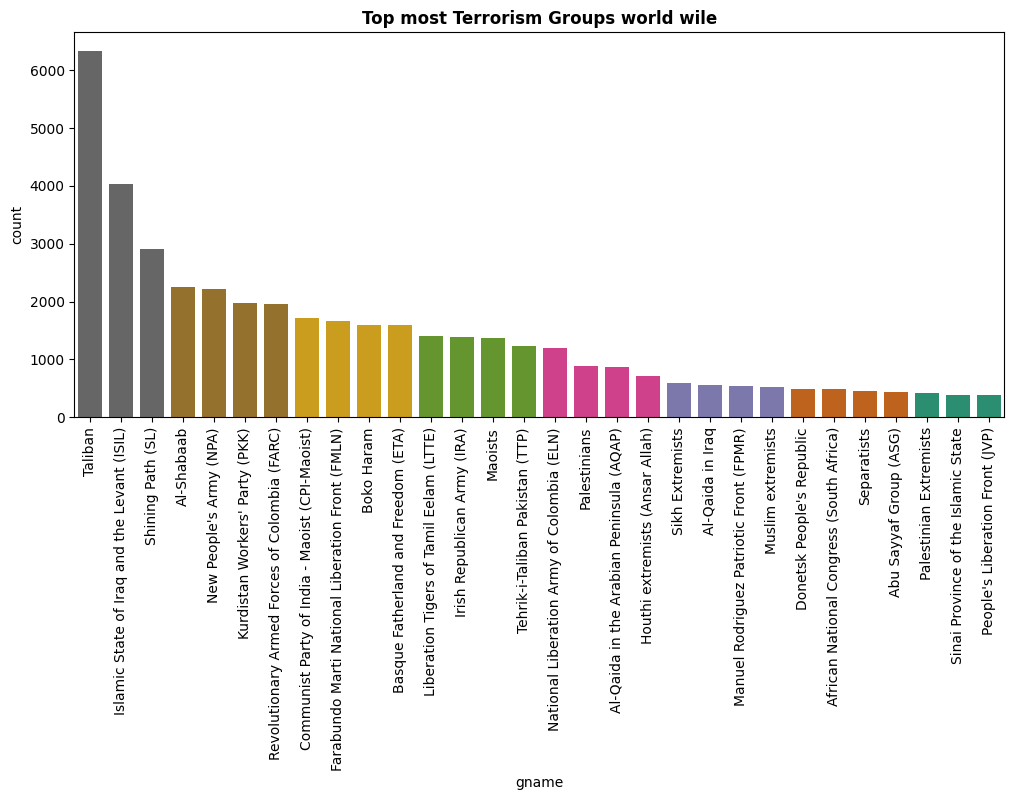

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(x=df.gname , order= df['gname'].value_counts()[1:].head(30).index,palette = 'Dark2_r')
plt.xticks(rotation = 90 )
plt.title('Top most Terrorism Groups world wile', fontweight = 'bold')
plt.show()

From Above we observe that

Taliban is having the most number of Attack in world wile it is the Wold no 1 Terrorist group

ISIL of Iraq is the second most Terrorist Group in the world

Later came shiningpath(SL) Terrorist Group

In [ ]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city',
       'latitude', 'longitude', 'success', 'suicide', 'attacktype1_txt',
       'targtype1_txt', 'targsubtype1_txt', 'gname', 'weaptype1_txt', 'nkill',
       'nwound', 'ishostkid'],
      dtype='object')

# Country Vs Weapon

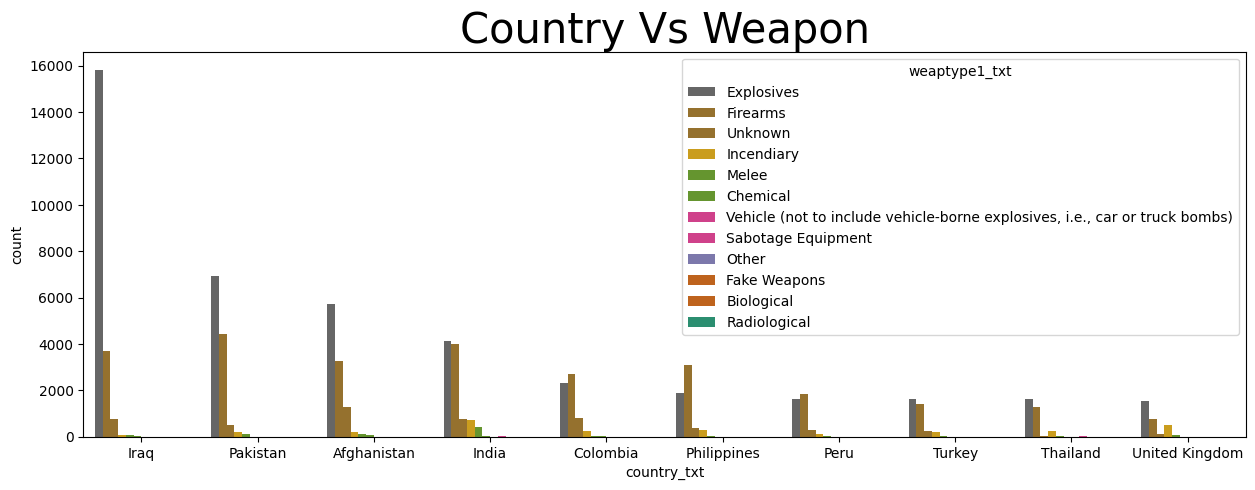

In [ ]:
plt.subplots(figsize = (15,5))
Top_10_Group = df['country_txt'].value_counts().index.tolist()[0:10]
snap = df[['country_txt','weaptype1_txt']]
country_Weapon = snap[snap['country_txt'].isin(Top_10_Group)]
sns.countplot(x='country_txt', hue ='weaptype1_txt', data = country_Weapon,order = df['country_txt'].value_counts().head(10).index  ,hue_order= df['weaptype1_txt'].value_counts().index,palette = 'Dark2_r')
plt.title('Country Vs Weapon', fontsize = 30)
plt.show()

From Above we observed that 

Most Attacked country is being exploid by Explosivr, Firearms , unknown , Incendiary, Melee, Chemecal weapons by the terrorist organinztion in world wile

# Country vs Terriorist Organization

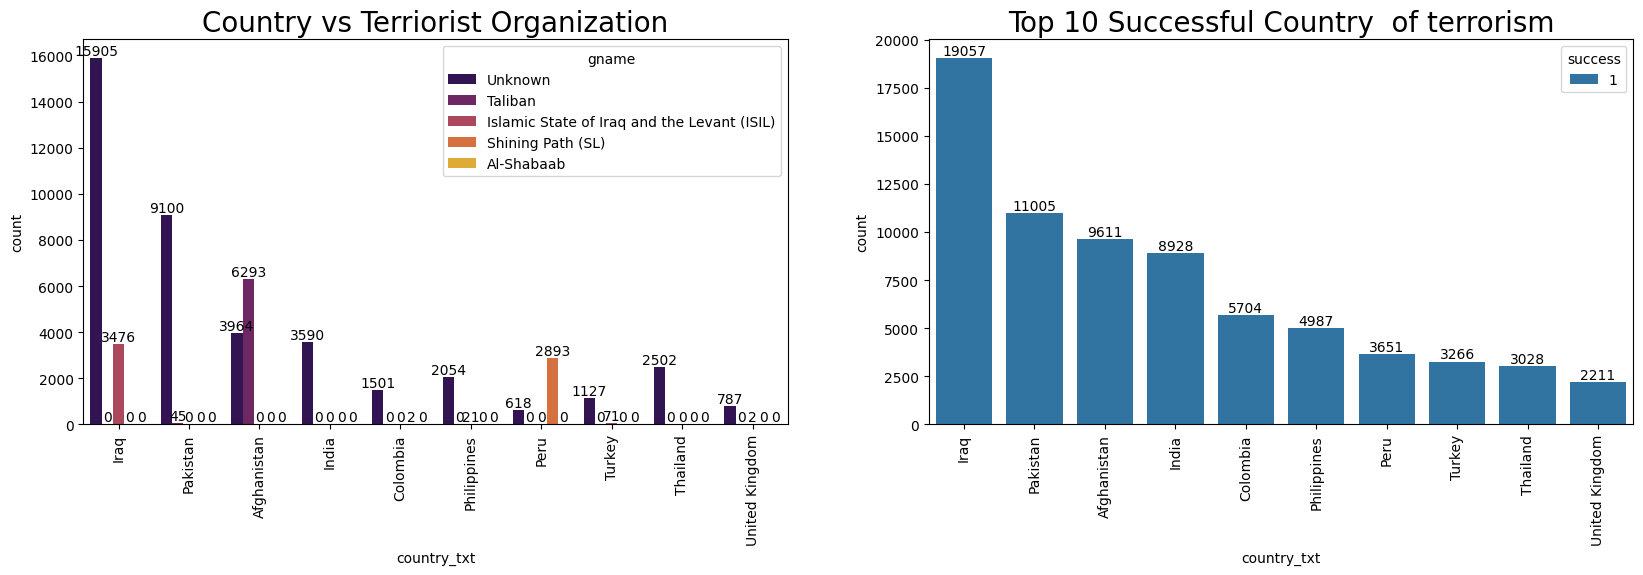

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
Top_10_Group = df['country_txt'].value_counts().index.tolist()[0:10]
snap = df[['country_txt','gname']]
country_Weapon = snap[snap['country_txt'].isin(Top_10_Group)]
ax = sns.countplot(x='country_txt', hue ='gname', data = country_Weapon,order = df['country_txt'].value_counts().head(10).index ,hue_order= df['gname'].value_counts().head(5).index,palette = 'inferno')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Country vs Terriorist Organization', fontsize = 20)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
ax=sns.countplot(data = df, x= "country_txt", hue = "success",order = df['country_txt'].value_counts()[:10].index, hue_order=df['success'].value_counts()[:1].index)
plt.xticks(rotation = 90)
plt.title('Top 10 Successful Country  of terrorism',fontsize = 20)
for i in ax.containers:
  ax.bar_label(i,)
plt.show()


From Above we observed that

Iraq -  Successful Terror attack rate is 19057 over that 15905 was attampted by Unknown Terror group and  3476 was attampted by ISIL 

Pakistan - Successful Terror attack rate is 11005 over that 9100 was attampted by Unknown Terrore group

Afghanistan - Successful Terror attack rate is 9611 over that 3964 was attampted by Unknown Terrore group and  6293 was attampted by Taliban

Peru - Successful Terror attack rate is 3651 over that 2893 was attampted by Shining Path(SL) Terrore group 


Rest of the country in the world havinf Terrore Attack but the Terror Organization is not taking any responsiblity thus it represnt as Unknown


# Country Vs Attack Type

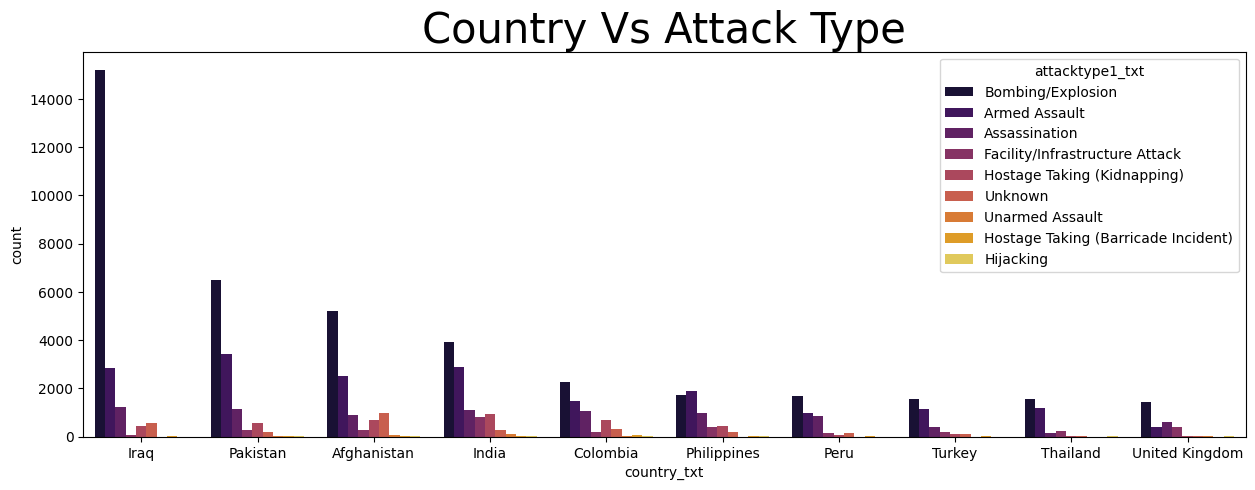

In [ ]:
plt.subplots(figsize = (15,5))
Top_10_Group = df['country_txt'].value_counts().index.tolist()[0:10]
snap = df[['country_txt','attacktype1_txt']]
country_Weapon = snap[snap['country_txt'].isin(Top_10_Group)]
sns.countplot(x='country_txt', hue ='attacktype1_txt', data = country_Weapon,order = df['country_txt'].value_counts().head(10).index ,hue_order= df['attacktype1_txt'].value_counts().head(10).index,palette = 'inferno')
plt.title('Country Vs Attack Type', fontsize = 30)
plt.show()

#Country  Vs Kills

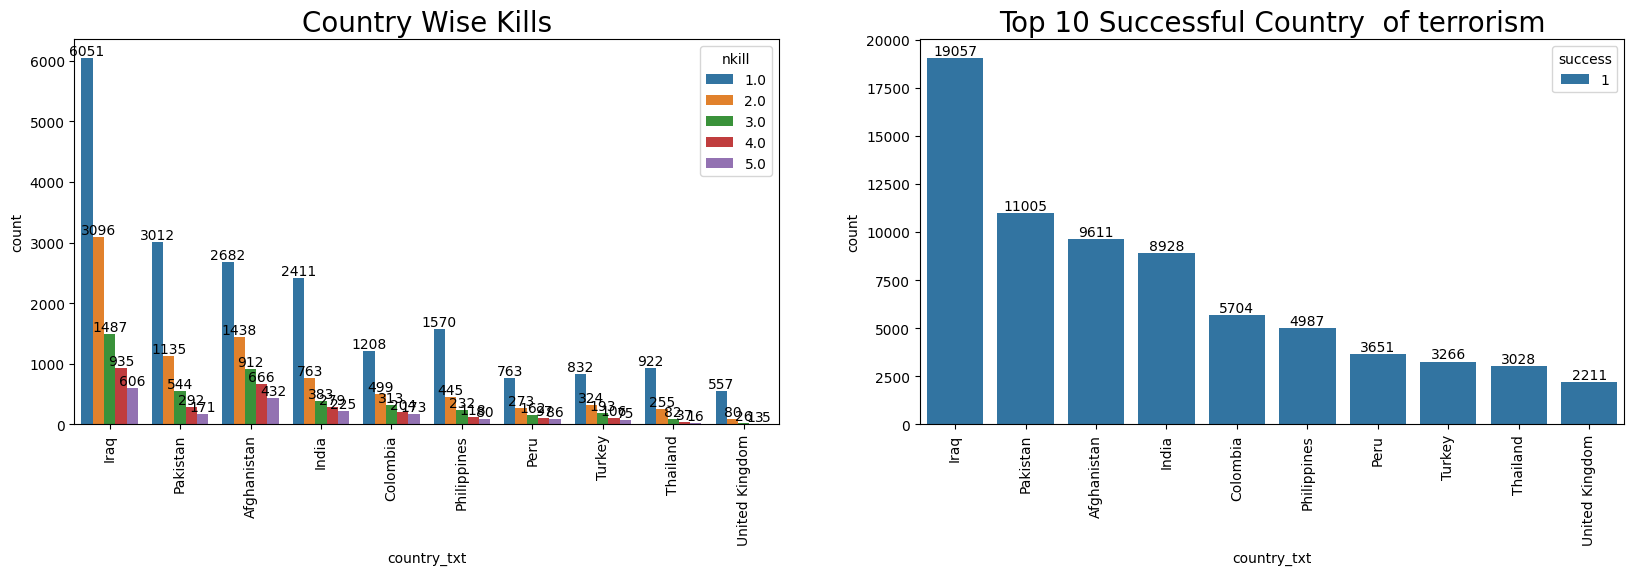

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
ax= sns.countplot(data =df, x= 'country_txt', hue = "nkill", order = df['country_txt'].value_counts().head(10).index,hue_order=df['nkill'].value_counts()[1:10].head(5).index )
plt.xticks(rotation = 90)
for i in ax.containers:
  ax.bar_label(i,)
plt.title("Country Wise Kills", fontsize = 20 )


plt.subplot(1,2,2)
ax=sns.countplot(data = df, x= "country_txt", hue = "success",order = df['country_txt'].value_counts()[:10].index, hue_order=df['success'].value_counts()[:1].index)
plt.xticks(rotation = 90)
plt.title('Top 10 Successful Country  of terrorism',fontsize = 20)
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

From above we observed that,

If the Attack is Successful then there is high chance of kills and majorly there will kill of 1 person atlest

like below

Iraq - The successful Target attack rate is 19057 so in that case the kill rate will be like 

1 person kill =6051

2 person kill =3096

3 person kill =1487

4 person kill =935

5 person kill =606

we can see same patterns will be for all

so from here we observed that atleast 1 person will kill if the attack happen in these countries



#Region Vs Attack Type

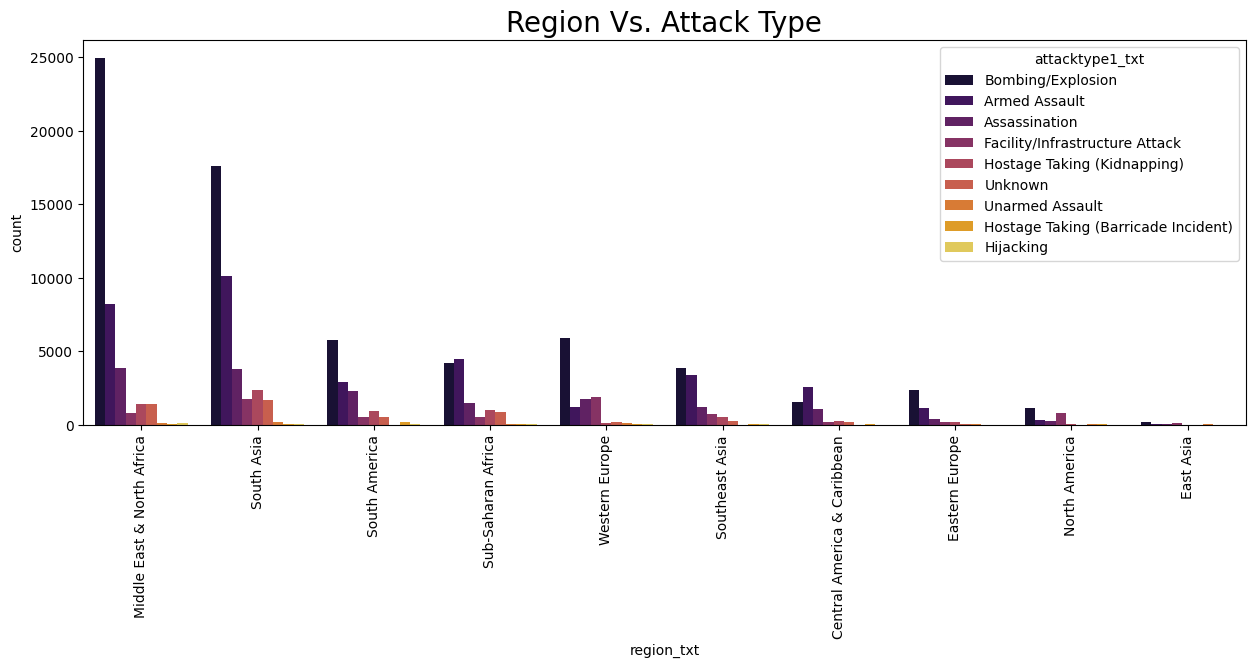

In [ ]:
plt.subplots(figsize = (15,5))
Top_10_Group = df['region_txt'].value_counts().index.tolist()[0:10]
snap = df[['region_txt','attacktype1_txt']]
country_Weapon = snap[snap['region_txt'].isin(Top_10_Group)]
sns.countplot(x='region_txt', hue ='attacktype1_txt', data = country_Weapon,order = df['region_txt'].value_counts().head(10).index, hue_order= df['attacktype1_txt'].value_counts().head(10).index,palette = 'inferno')
plt.title('Region Vs. Attack Type', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

#Region Vs Weapon Type

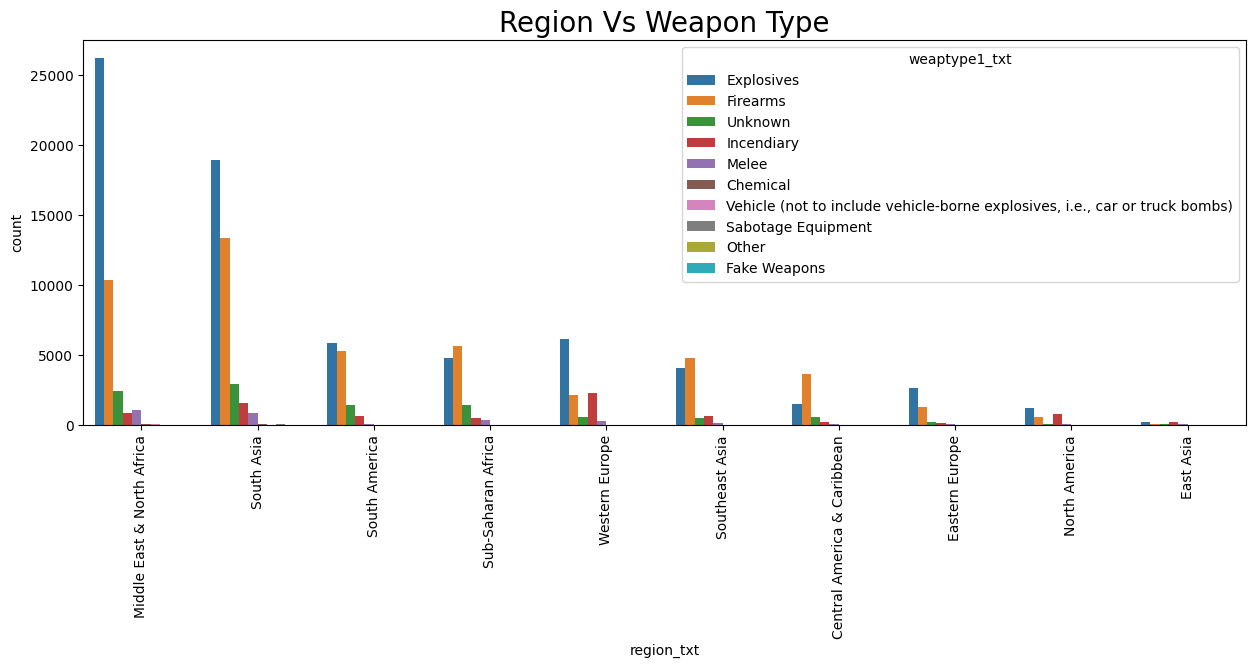

In [ ]:
plt.figure(figsize = (15,5))
Top_10_region_Group = df['region_txt'].value_counts().index.tolist()[:10]
sn = df[['region_txt','weaptype1_txt']]
Region_weapon = sn[sn['region_txt'].isin(Top_10_region_Group)]
sns.countplot(data = Region_weapon , x = 'region_txt', hue = 'weaptype1_txt', order = df['region_txt'].value_counts().head(10).index, hue_order =df['weaptype1_txt'].value_counts().head(10).index)
plt.xticks(rotation = 90)
plt.title('Region Vs Weapon Type', fontsize = 20)
plt.show()

# Region vs Terriorist Organization

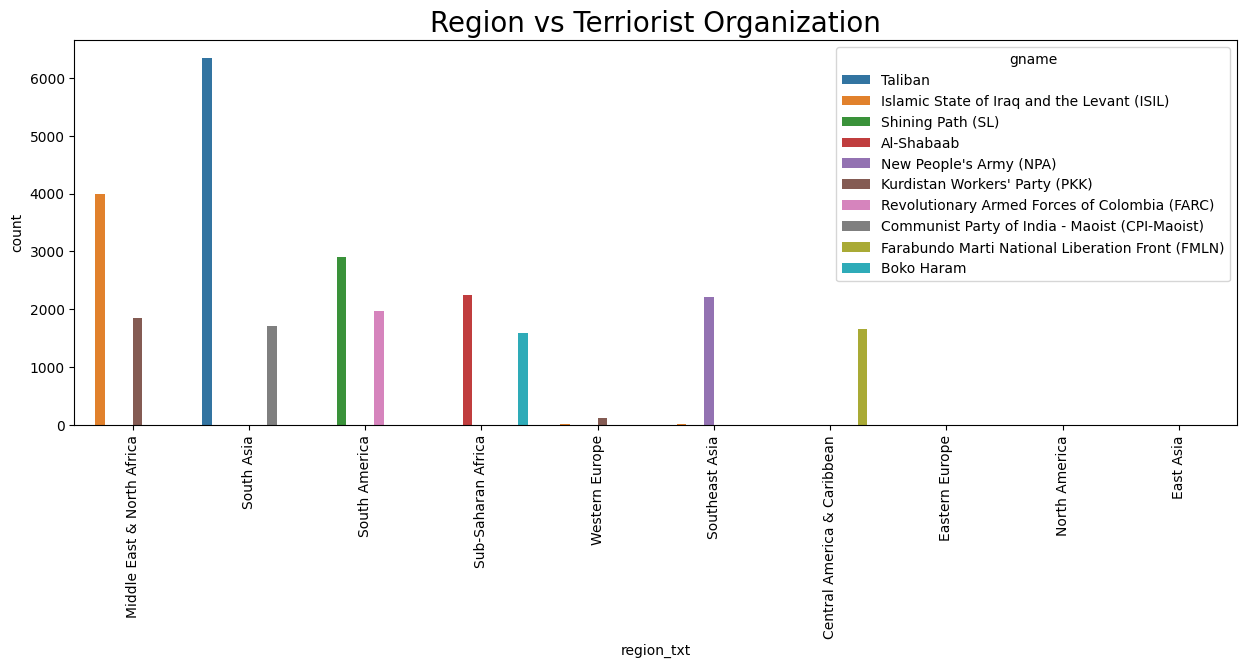

In [ ]:
plt.figure(figsize = (15,5))
Top_10_region_Group = df['region_txt'].value_counts().index.tolist()[:10]
sn = df[['region_txt','gname']]
Region_weapon = sn[sn['region_txt'].isin(Top_10_region_Group)]
sns.countplot(data = Region_weapon , x = 'region_txt', hue = 'gname', order = df['region_txt'].value_counts().head(10).index, hue_order =df['gname'].value_counts()[1:11].head(10).index)
plt.xticks(rotation = 90)
plt.title('Region vs Terriorist Organization', fontsize = 20)
plt.show()

# Region vs Kills

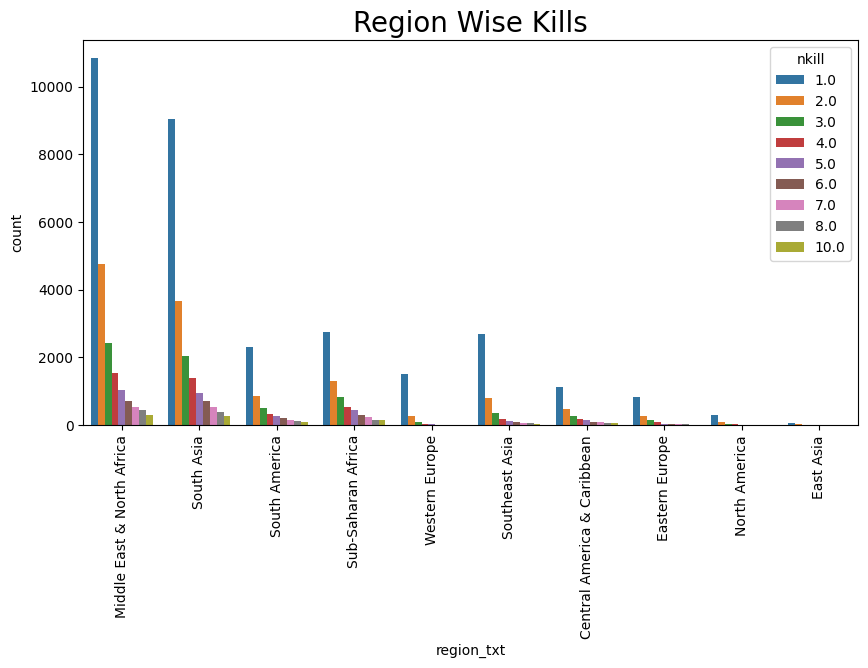

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data =df, x= 'region_txt', hue = "nkill", order = df['region_txt'].value_counts().head(10).index,hue_order=df['nkill'].value_counts()[1:10].head(10).index )
plt.xticks(rotation = 90)
plt.title("Region Wise Kills", fontsize = 20 )
plt.show()

From above we observed that

The Middle East &  North Africa are the most Effected region by the Terrorist Organiztion 

The attack type in the region are from Bombing / Explosive , Armed Assault and Assasination 

The Weapon type used in this region are Explosivr, Firearms , unknown , Incendiary, Melee, Chemecal

The Terroris Organization in these region are mailny Taliban, ISIL,Shining path(sl)





# City vs Kills

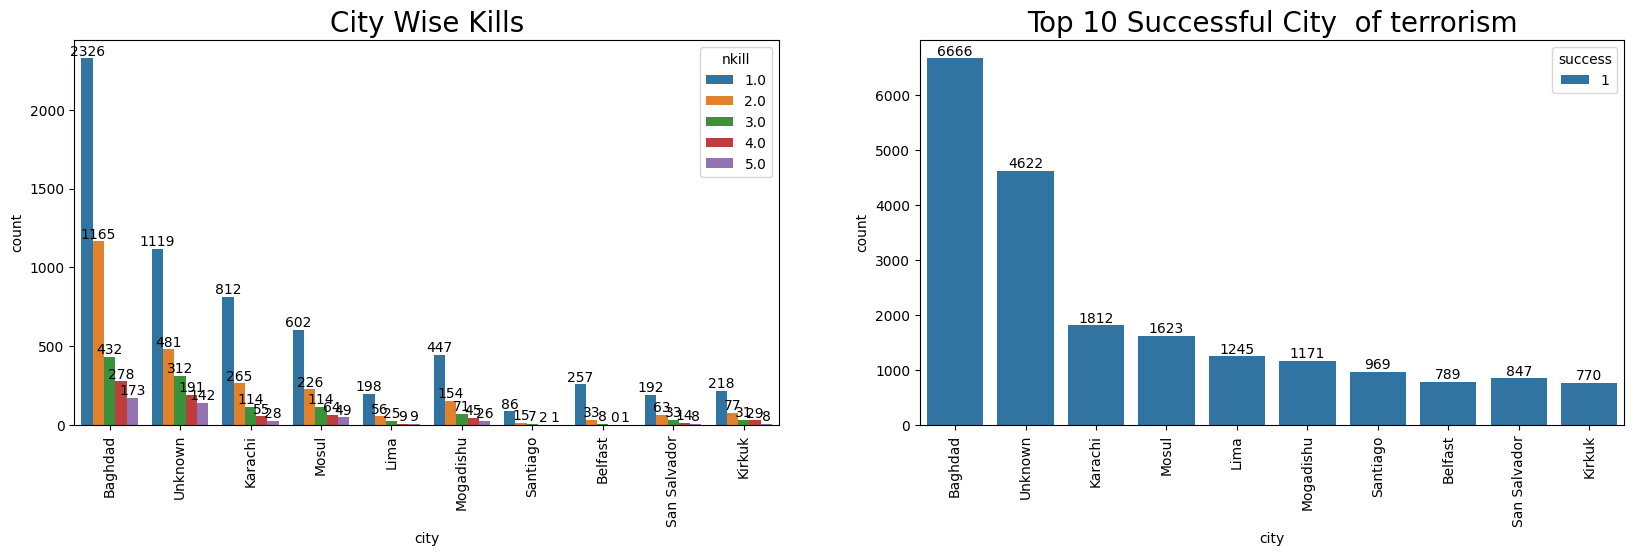

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
ax=sns.countplot(data =df, x= 'city', hue = "nkill", order = df['city'].value_counts().head(10).index,hue_order=df['nkill'].value_counts()[1:10].head(5).index )
plt.xticks(rotation = 90)
for i in ax.containers:
  ax.bar_label(i,)
plt.title("City Wise Kills", fontsize = 20 )


plt.subplot(1,2,2)
ax=sns.countplot(data = df, x= "city", hue = "success",order = df['city'].value_counts()[:10].index, hue_order=df['success'].value_counts()[:1].index)
plt.xticks(rotation = 90)
plt.title('Top 10 Successful City  of terrorism',fontsize = 20)
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

From Above we observed that

 Baghdad is the most Attack city in the world and the no of kills are more in this city 
 out of 6666 succsefull attack happen
 in which 
 
1 person kill =2326

2 person kill =1165

3 person kill =432

4 person kill =278

5 person kill =173

we can see same patterns will be for all

so from here we observed that atleast 1 person will kill if the attack happen in these Cites 


# Weapon Vs Kills

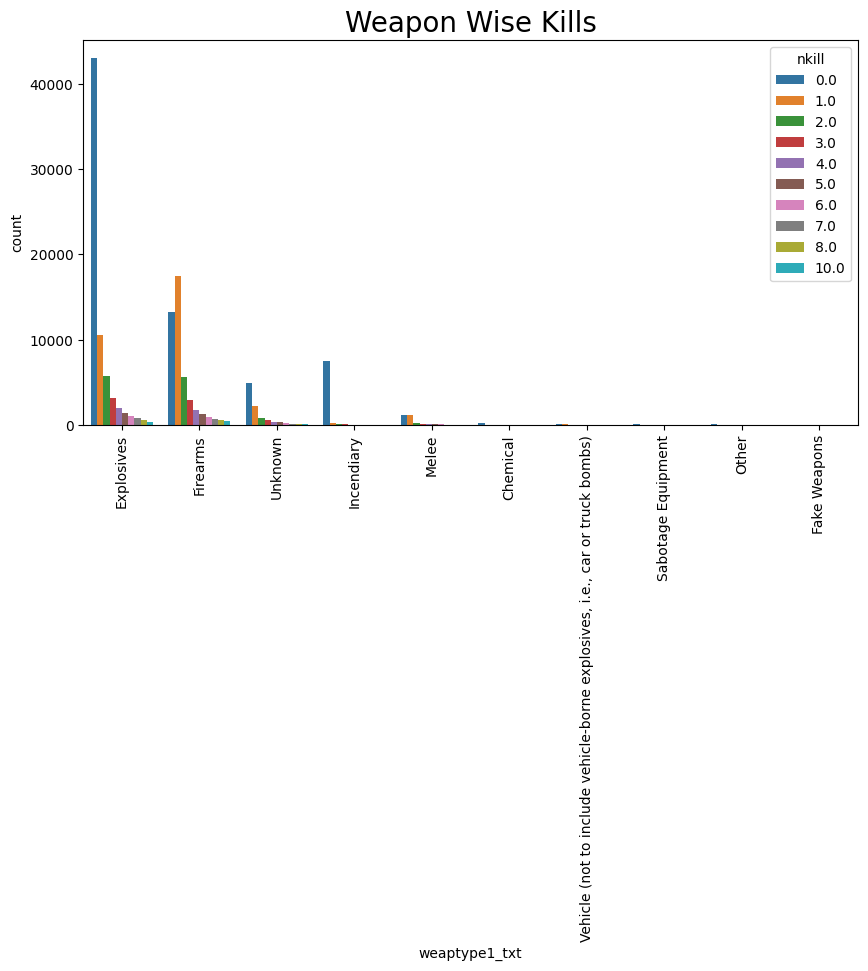

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data =df, x= 'weaptype1_txt', hue = "nkill", order = df['weaptype1_txt'].value_counts().head(10).index,hue_order=df['nkill'].value_counts().head(10).index )
plt.xticks(rotation = 90)
plt.title("Weapon Wise Kills", fontsize = 20 )
plt.show()

From above we observed that the

Explosive kill more any other weapon so

Explosive type of weapon is most dangerios weapon used by the terrorist organinztion 

Firearms  type of weapon is second most dangerios weapon used by the terrorist organinztion 

#Contry Wise Suicide

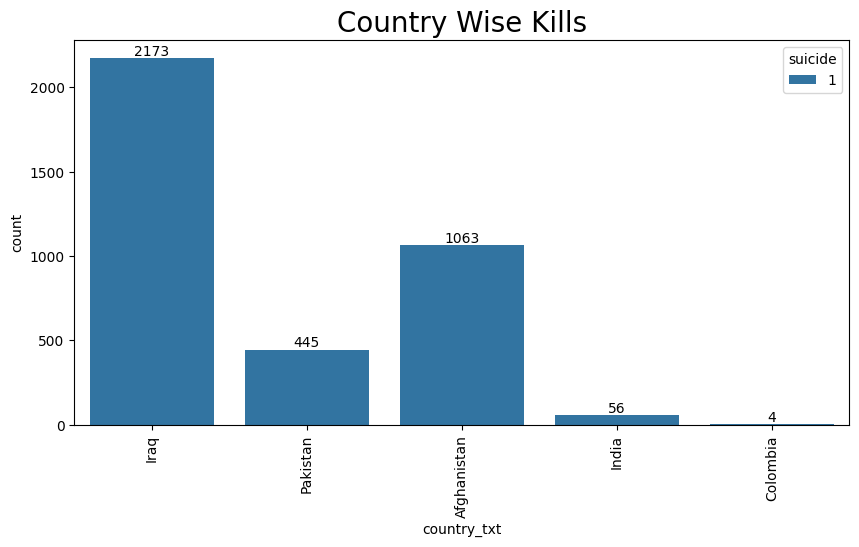

In [ ]:
plt.figure(figsize = (10,5))
ax =sns.countplot(data =df, x= 'country_txt', hue = "suicide", order = df['country_txt'].value_counts().head(5).index,hue_order=df['suicide'].value_counts()[1:2].index )
plt.xticks(rotation = 90)
for i in ax.containers:
  ax.bar_label(i,)
plt.title("Country Wise Kills", fontsize = 20 )
plt.show()

From Above we observed that 
The Suicide are more in Iraq  cases

Then The Afghanistan have the more no Suicide cases 

#Success vs Suicide

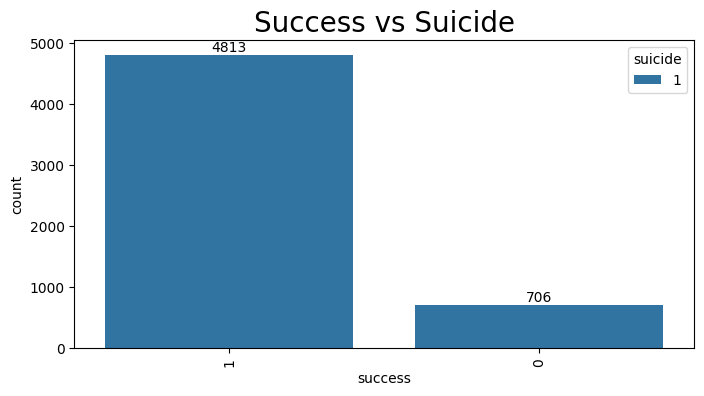

In [ ]:
plt.figure(figsize = (8,4))
ax = sns.countplot(data =df, x= 'success', hue = "suicide", order = df['success'].value_counts().index,hue_order=df['suicide'].value_counts()[1:2].index )
plt.xticks(rotation = 90)
plt.title("Success vs Suicide", fontsize = 20 )
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

From above we observed that 

If there is Success in Attack the there is high chance in suicide 

# Weapon Type Wise Success

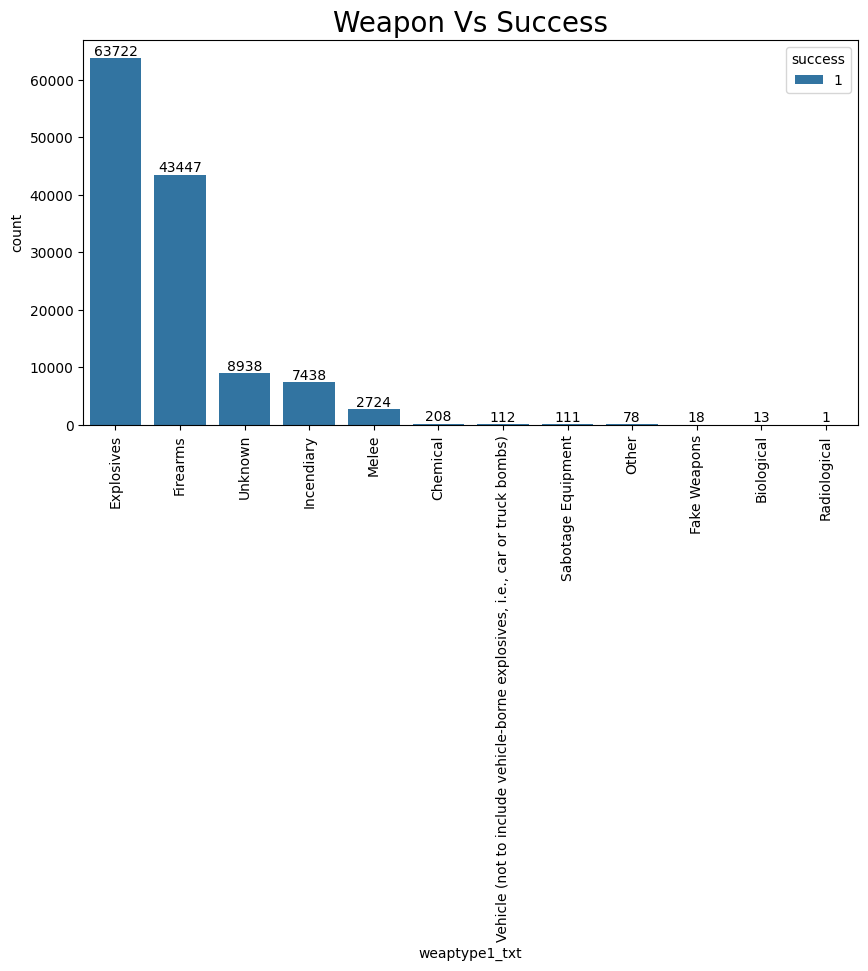

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data =df, x= 'weaptype1_txt', hue = "success", order = df['weaptype1_txt'].value_counts().index,hue_order=df['success'].value_counts()[0:1].index )
plt.xticks(rotation = 90)
plt.title("Weapon Vs Success", fontsize = 20 )
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

Explosive, Firearms are the most used by the terrorist organization to get successful in Attack

#Weapon Vs Suicide

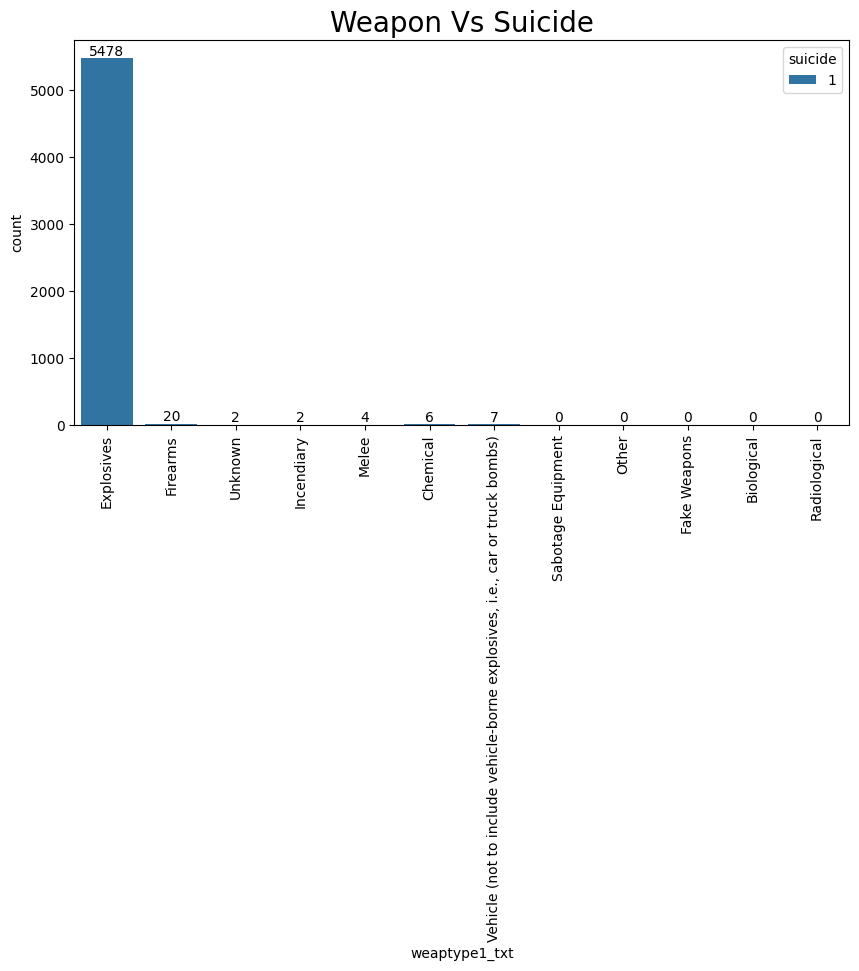

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data =df, x= 'weaptype1_txt', hue = "suicide", order = df['weaptype1_txt'].value_counts().index,hue_order=df['suicide'].value_counts()[1:2].index )
plt.xticks(rotation = 90)
plt.title("Weapon Vs Suicide", fontsize = 20 )
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

From above we observed that there is high chance of suicide if there is Explosive wepon is used for the successfull attack by the terrorist organiztion

# Country Vs ishostkid

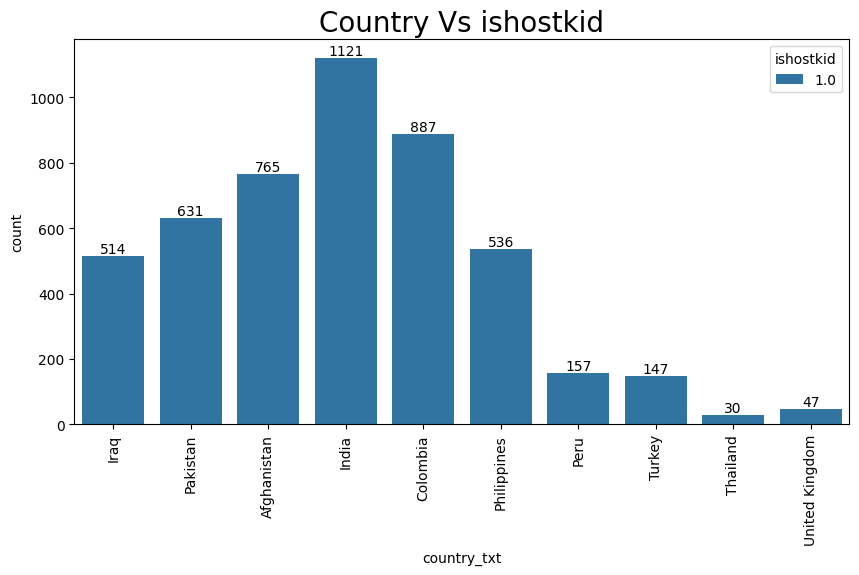

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data =df, x= 'country_txt', hue = "ishostkid", order = df['country_txt'].value_counts().head(10).index,hue_order=df['ishostkid'][1:2].value_counts().index )
plt.xticks(rotation = 90)
plt.title("Country Vs ishostkid", fontsize = 20 )
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

From above we observed that

India has the most Hosteg as kid by the Terrorist Organiztion

# Target Type vs Ishostkid

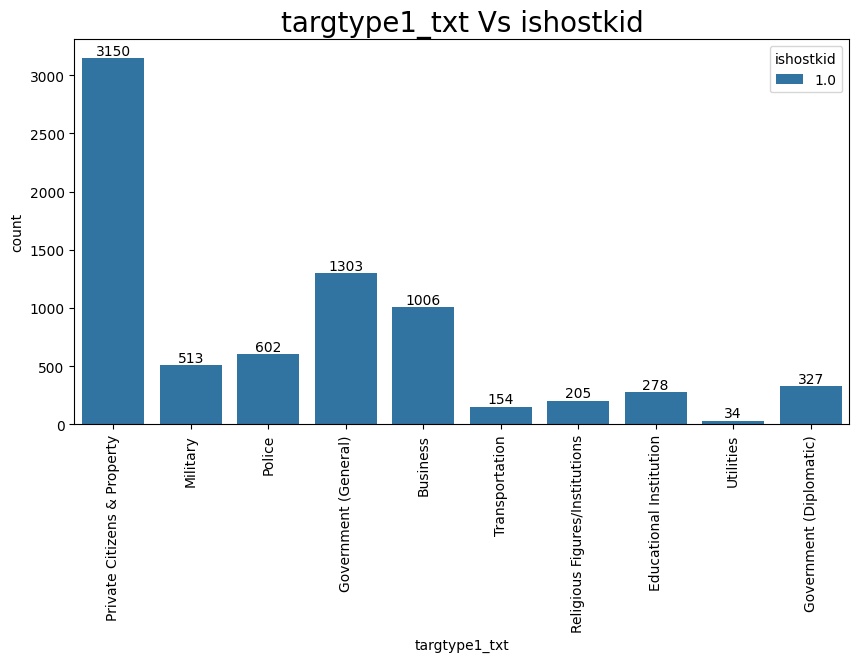

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data =df, x= 'targtype1_txt', hue = "ishostkid", order = df['targtype1_txt'].value_counts().head(10).index,hue_order=df['ishostkid'][1:2].value_counts().index )
plt.xticks(rotation = 90)
plt.title("targtype1_txt Vs ishostkid", fontsize = 20 )
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

From Above we observed  that

Private citizens & property and Goverment(Gerenal) have the more no in  hotage as kid   by the terrorist 

# Trends Top Most terrorist Group in World Wide

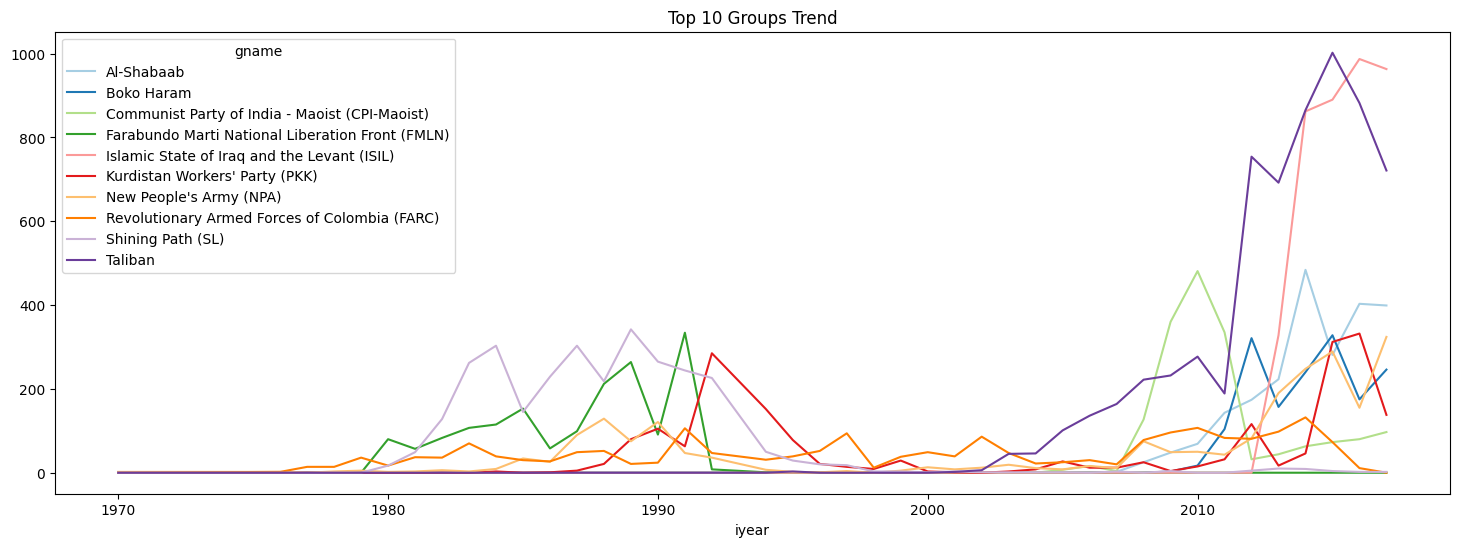

In [ ]:
top_groups10=df[df['gname'].isin(df['gname'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.iyear,top_groups10.gname).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 10 Groups Trend")
plt.show()

# Trends Top Most Success in Attack in past Year  in World Wide#

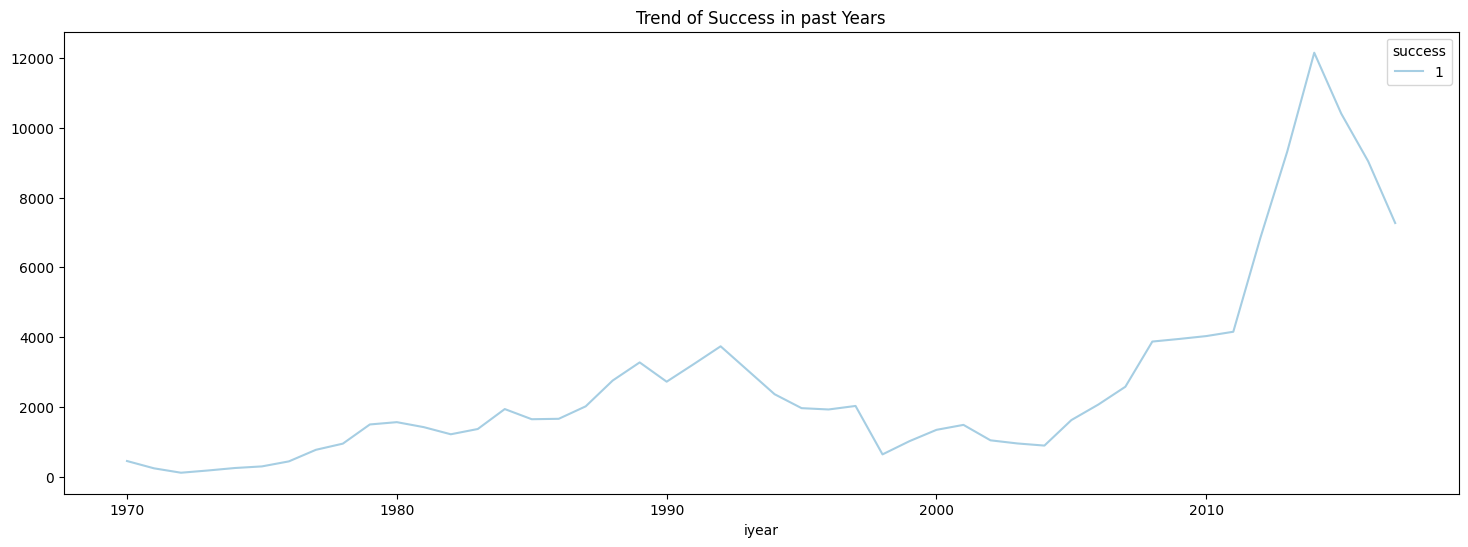

In [ ]:
top_groups10=df[df['success'].isin(df['success'].value_counts()[:1].index)]
pd.crosstab(top_groups10.iyear,top_groups10.success).plot(color=sns.color_palette('Paired'))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Trend of Success in past Years")
plt.show()

#Trend of Kills in past few Years

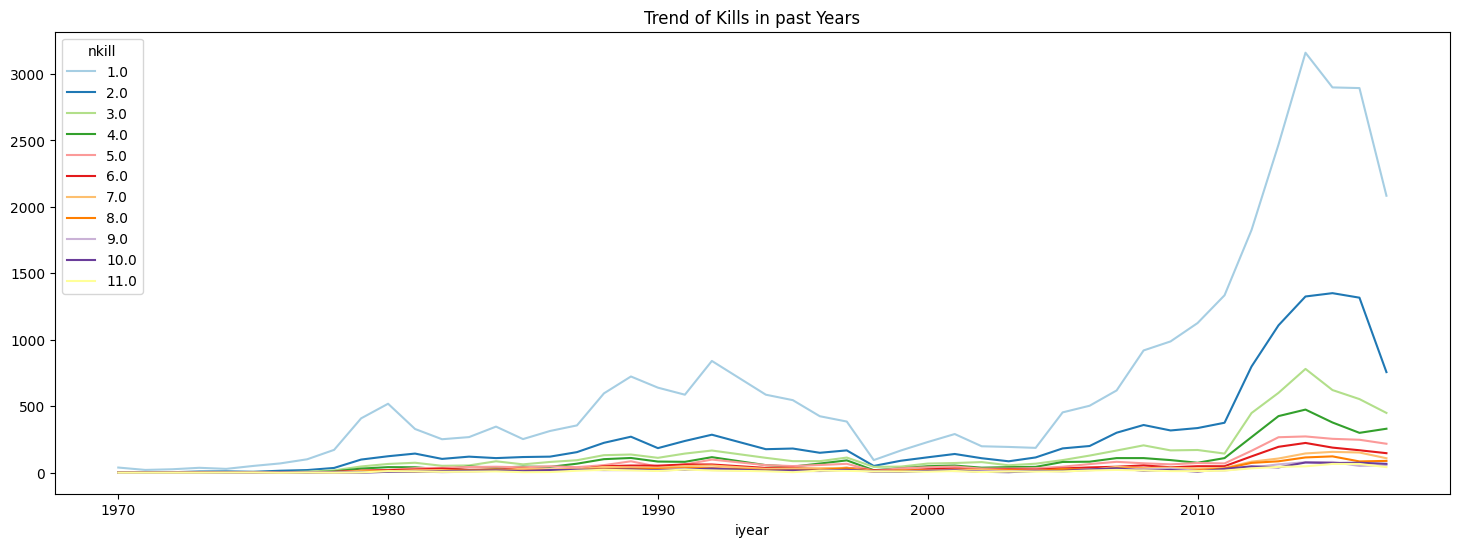

In [ ]:
top_groups10=df[df['nkill'].isin(df['nkill'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.iyear,top_groups10.nkill).plot(color=sns.color_palette('Paired'))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Trend of Kills in past Years")
plt.show()

# Trends Top year vs country 

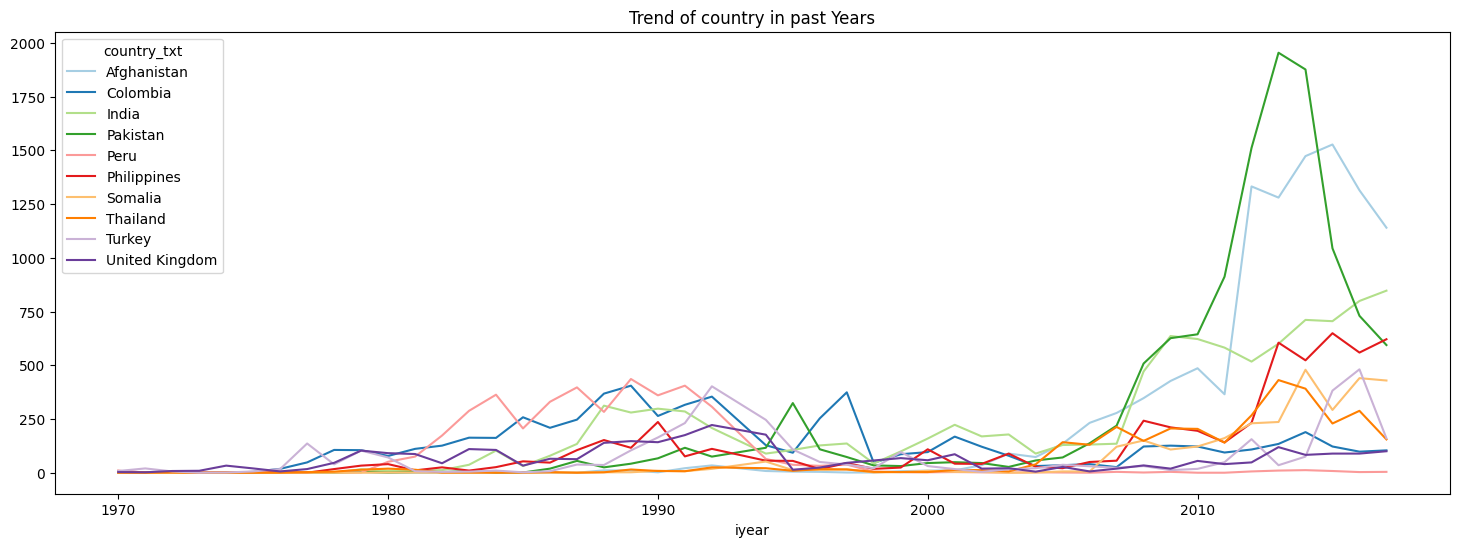

In [ ]:
top_groups10=df[df['country_txt'].isin(df['country_txt'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.iyear,top_groups10.country_txt).plot(color=sns.color_palette('Paired'))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Trend of country in past Years")
plt.show()

# Trends Top Year vs weapon Patterns 

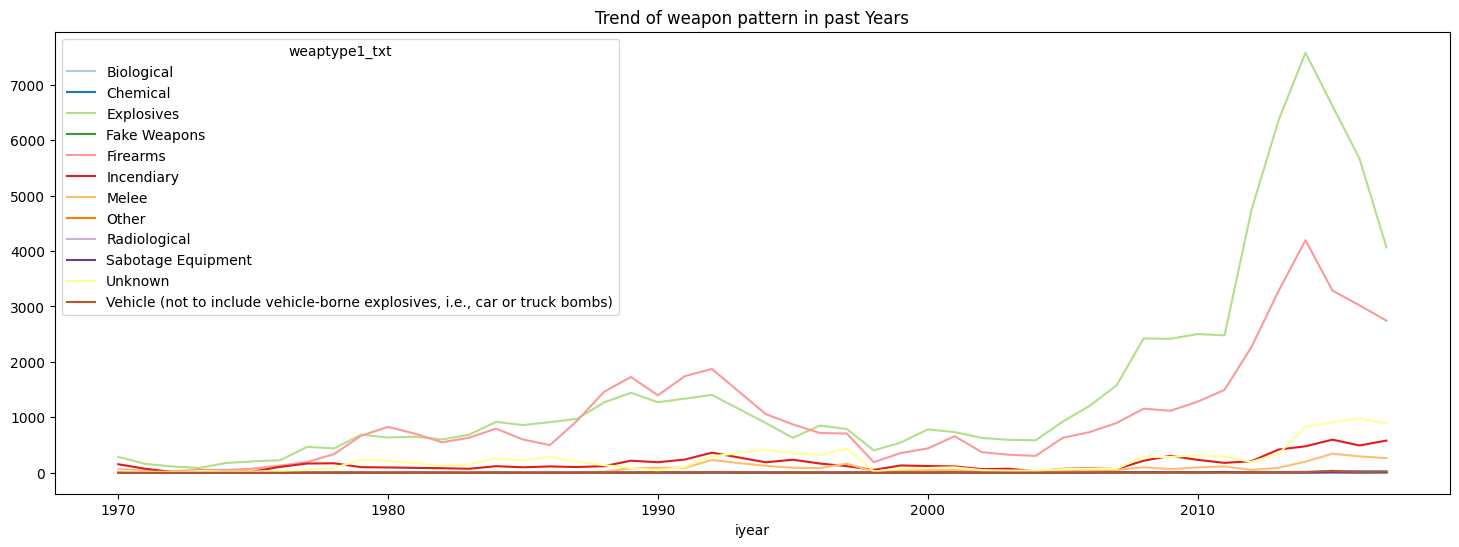

In [ ]:
top_groups10=df[df['weaptype1_txt'].isin(df['weaptype1_txt'].value_counts().index)]
pd.crosstab(top_groups10.iyear,top_groups10.weaptype1_txt).plot(color=sns.color_palette('Paired'))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Trend of weapon pattern in past Years")
plt.show()

# Trends Top year vs Attack type Patterns 

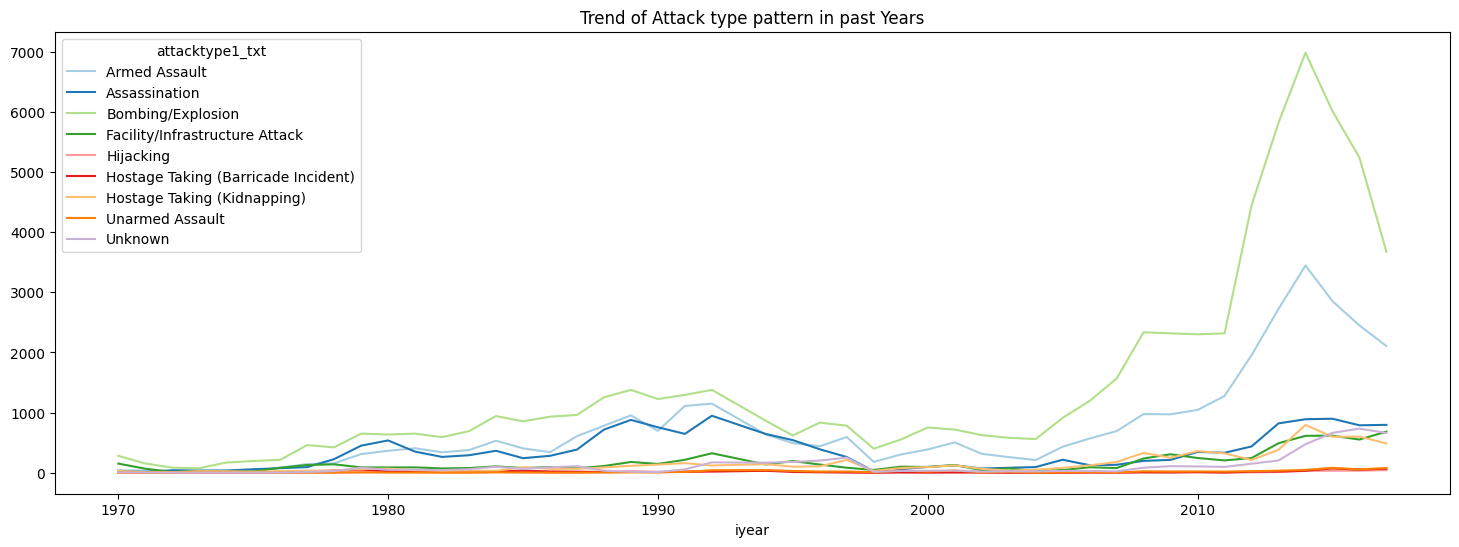

In [ ]:
top_groups10=df[df['attacktype1_txt'].isin(df['attacktype1_txt'].value_counts().index)]
pd.crosstab(top_groups10.iyear,top_groups10.attacktype1_txt).plot(color=sns.color_palette('Paired'))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Trend of Attack type pattern in past Years")
plt.show()

# Trends Top year vs Target type Patterns 

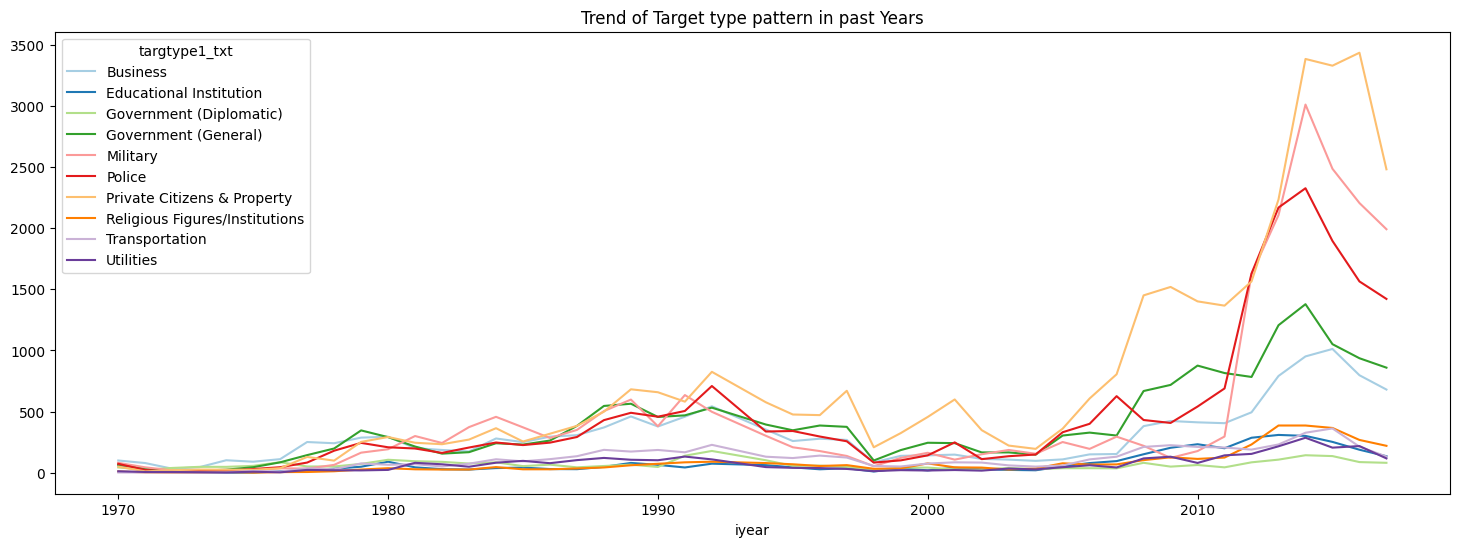

In [ ]:
top_groups10=df[df['targtype1_txt'].isin(df['targtype1_txt'].value_counts()[:10].index)]
pd.crosstab(top_groups10.iyear,top_groups10.targtype1_txt).plot(color=sns.color_palette('Paired'))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Trend of Target type pattern in past Years")
plt.show()